In [2]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import gsw
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from  modules import graficasERFEN
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
importlib.reload(graficasERFEN) #Este comando es necesario para recargar las actualizaciones cuando se trabaja en modulos propios


<module 'modules.graficasERFEN' from '/home/chrisbermudezr/Ictioplankton_CPC/scripts/modules/graficasERFEN.py'>

In [9]:
#1993-04
#Data uploading

CPC_1993_04 = pd.read_excel("../data/raw/oceanography/erfen_data/Pacifico_22_1993_Invierno.xlsx", sheet_name='data')
print(CPC_1993_04.columns)
print(CPC_1993_04.dtypes)
CPC_1993_04_variables = CPC_1993_04[['Fecha[aaaa-mm-dd UT-5]', 'Hora[hh:mm:ss UT-5]', 'Latitud[deg]', 'Longitud[deg]', 'Estacion[#]', 'Profundidad[m]', 'Temperatura[°C]']]
CPC_1993_04_variables.head()

Index(['Fecha[aaaa-mm-dd UT-5]', 'Hora[hh:mm:ss UT-5]', 'Latitud[deg]',
       'Longitud[deg]', 'Estacion[#]', 'Profundidad[m]', 'Temperatura[°C]',
       'Conductividad [S/m]', 'Salinidad[UPS]', 'Densidad[σ-θ, kg/m^3]',
       'Oxigeno[mg/l]', 'pH [Dmnless]', 'NH4 [µmol/L]', 'NO2 [µmol/L]',
       'NO3 [µmol/L]', ' PO4 [µmol/L]', 'SIO3 [µmol/L]', 'OD [mg O2/L]',
       'Tipo_datos'],
      dtype='object')
Fecha[aaaa-mm-dd UT-5]    datetime64[ns]
Hora[hh:mm:ss UT-5]               object
Latitud[deg]                     float64
Longitud[deg]                    float64
Estacion[#]                        int64
Profundidad[m]                     int64
Temperatura[°C]                  float64
Conductividad [S/m]              float64
Salinidad[UPS]                   float64
Densidad[σ-θ, kg/m^3]            float64
Oxigeno[mg/l]                    float64
pH [Dmnless]                     float64
NH4 [µmol/L]                     float64
NO2 [µmol/L]                     float64
NO3 [µmol/L]    

,Fecha[aaaa-mm-dd UT-5],Hora[hh:mm:ss UT-5],Latitud[deg],Longitud[deg],Estacion[#],Profundidad[m],Temperatura[°C]
0,1993-04-15,04:01:00,6.3,-78.0,9,0,27.0
1,1993-04-15,04:01:00,6.3,-78.0,9,5,27.3
2,1993-04-15,04:01:00,6.3,-78.0,9,10,27.5
3,1993-04-15,04:01:00,6.3,-78.0,9,25,22.3
4,1993-04-15,04:01:00,6.3,-78.0,9,50,18.2


In [30]:
CPC_1993_04_long = CPC_1993_04_variables.melt(id_vars = ['Fecha[aaaa-mm-dd UT-5]', 'Hora[hh:mm:ss UT-5]', 'Latitud[deg]',	'Longitud[deg]',	'Estacion[#]',	'Profundidad[m]'], 
                                    value_vars = ['Temperatura[°C]'] )

print(CPC_1993_04_long.head())
estaciones_list_1993_04 = CPC_1993_04_long['Estacion[#]'].drop_duplicates().tolist()
print(estaciones_list_1993_04)
CPC_1993_04_long.rename(columns = {'Fecha[aaaa-mm-dd UT-5]': 'Fecha', 'Hora[hh:mm:ss UT-5]': 'Hora', 'Latitud[deg]': 'Latitud', 'Longitud[deg]': 'Longitud', 'Estacion[#]': 'Estacion', 'Profundidad[m]': 'Profundidad', 'variable': 'Variable', 'value': 'Value' }, inplace=True)
print(CPC_1993_04_long.columns)

  Fecha[aaaa-mm-dd UT-5] Hora[hh:mm:ss UT-5]  Latitud[deg]  Longitud[deg]  \
0             1993-04-15            04:01:00           6.3          -78.0   
1             1993-04-15            04:01:00           6.3          -78.0   
2             1993-04-15            04:01:00           6.3          -78.0   
3             1993-04-15            04:01:00           6.3          -78.0   
4             1993-04-15            04:01:00           6.3          -78.0   

   Estacion[#]  Profundidad[m]         variable  value  
0            9               0  Temperatura[°C]   27.0  
1            9               5  Temperatura[°C]   27.3  
2            9              10  Temperatura[°C]   27.5  
3            9              25  Temperatura[°C]   22.3  
4            9              50  Temperatura[°C]   18.2  
[9, 11, 12, 14, 17, 19, 20, 21, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 61, 62, 67, 68]
Index(['Fecha', 'Hora', 'Latitud', 'Lon

In [36]:

temperatura = CPC_1993_04_long[CPC_1993_04_long["Variable"] == "Temperatura[°C]"]["Value"]
print(temperatura)



0      27.0
1      27.3
2      27.5
3      22.3
4      18.2
       ... 
579    10.4
580     8.9
581     6.4
582     5.2
583     5.0
Name: Value, Length: 584, dtype: float64


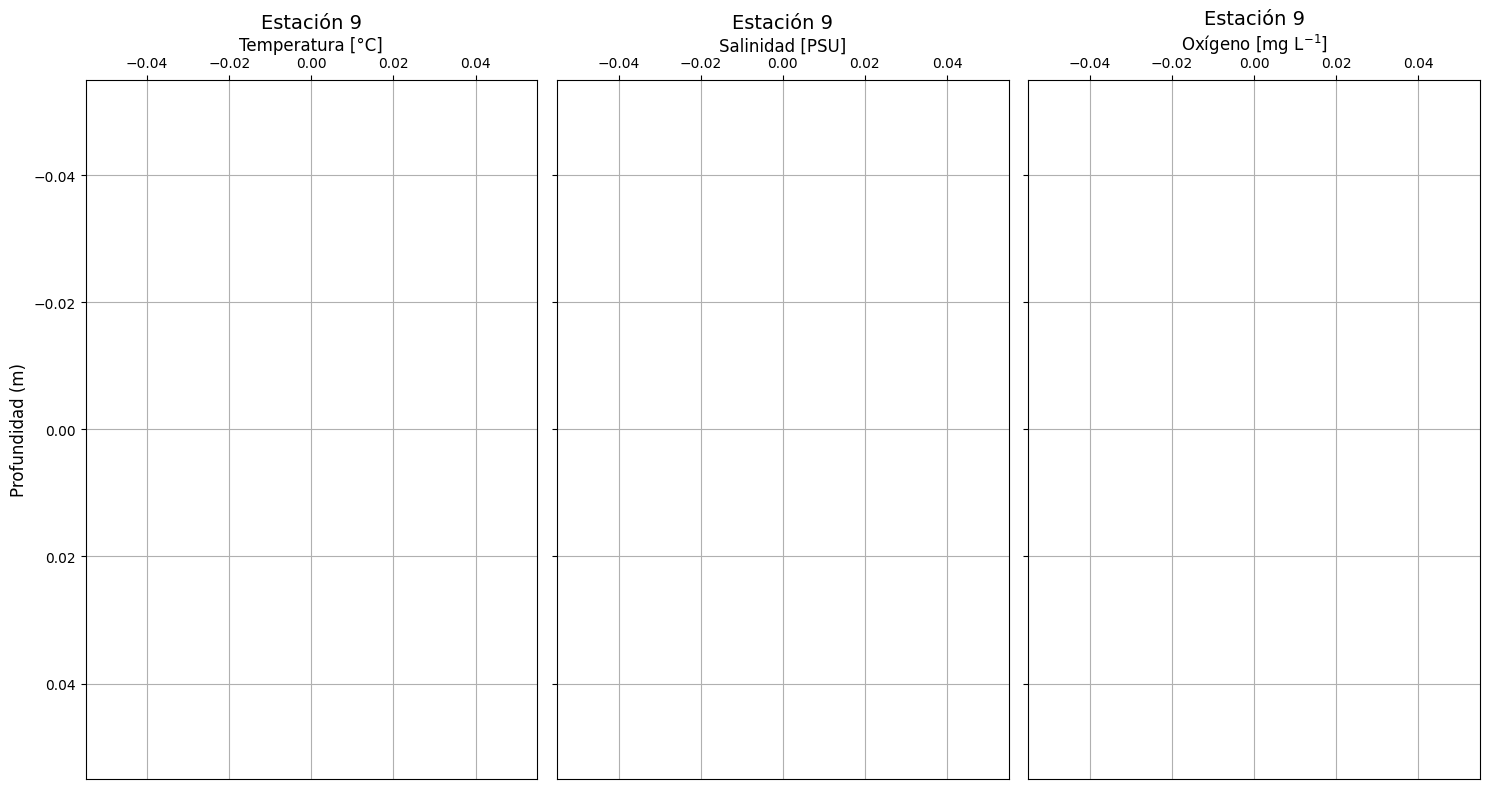

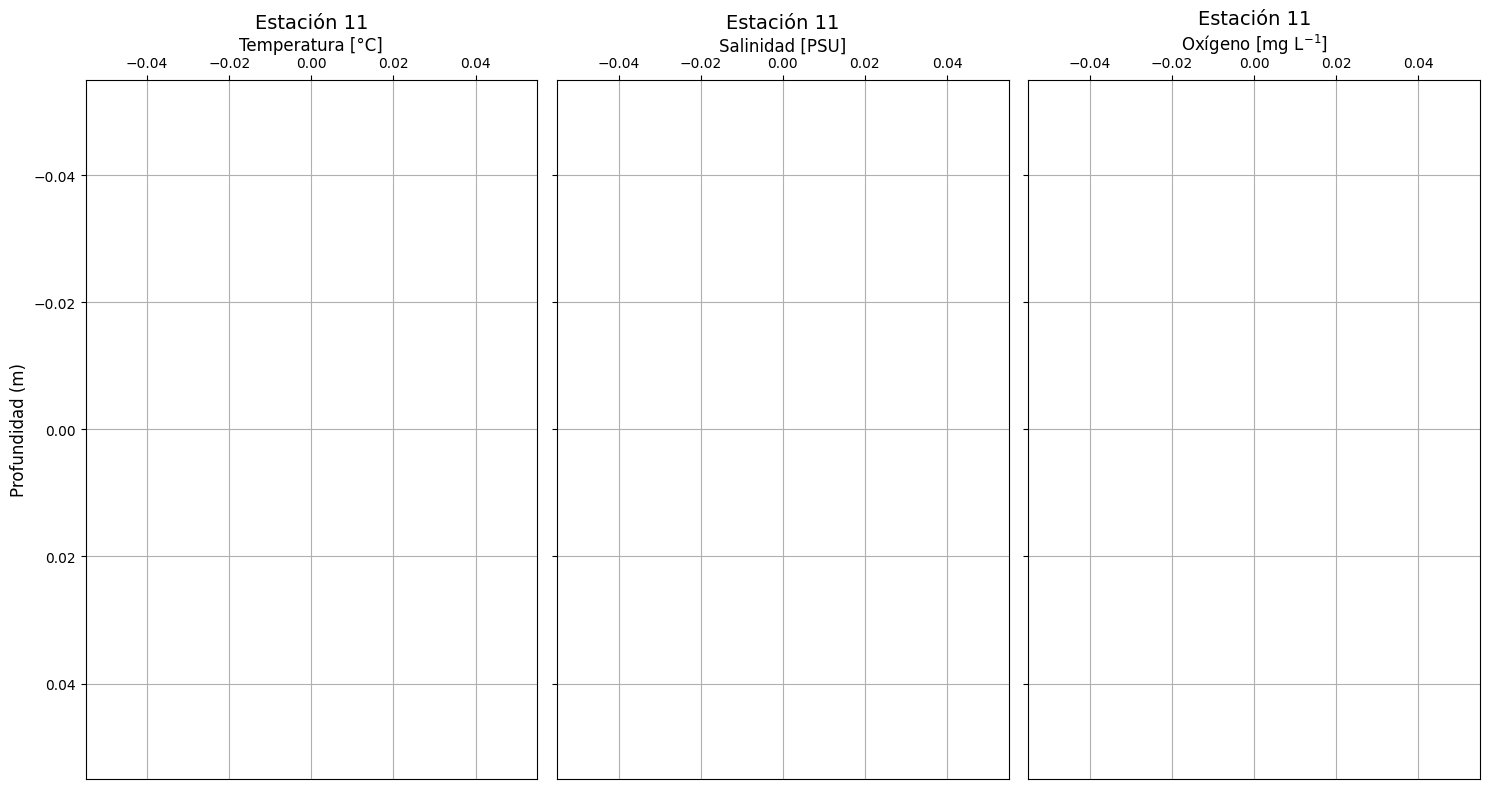

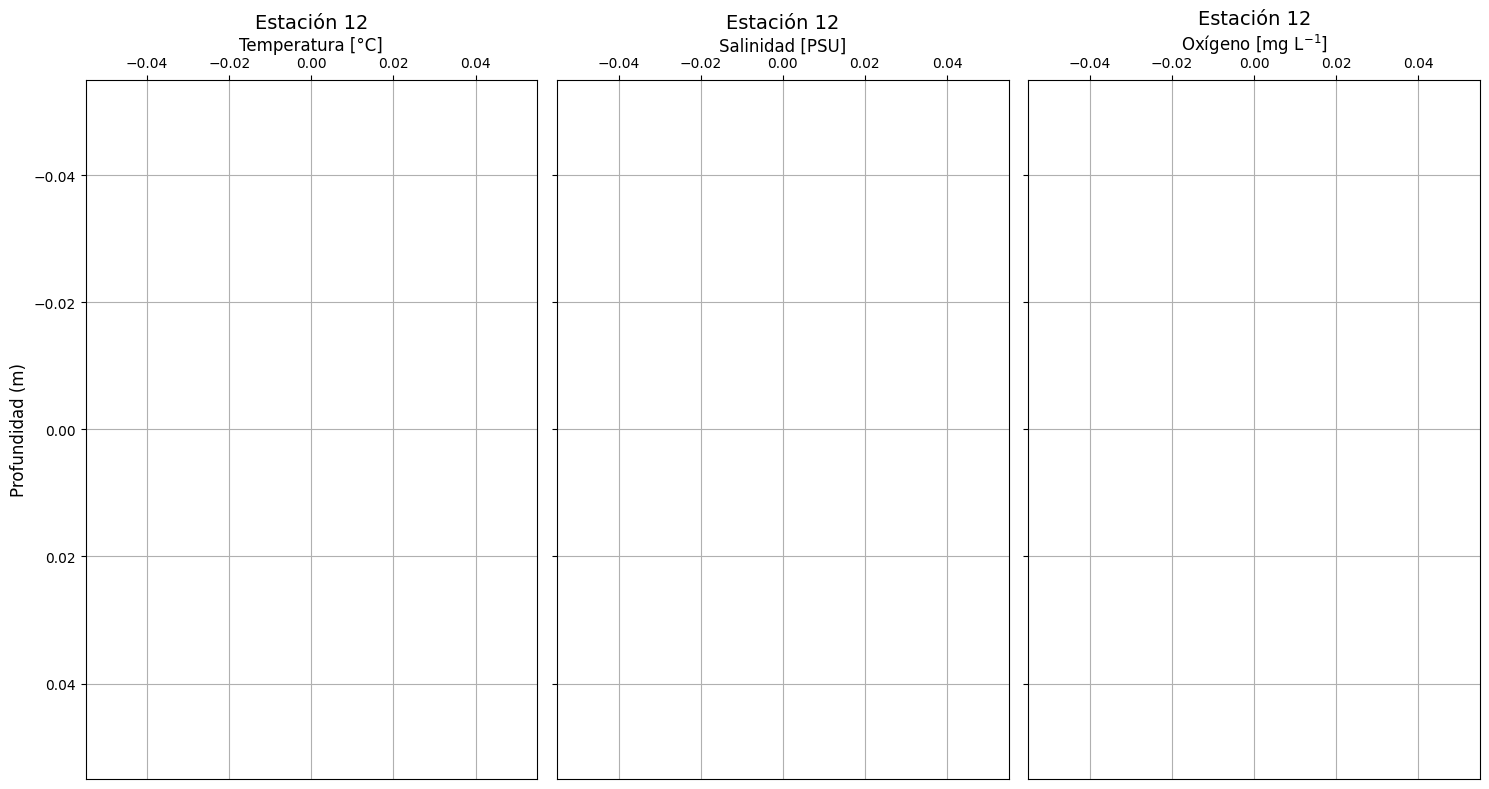

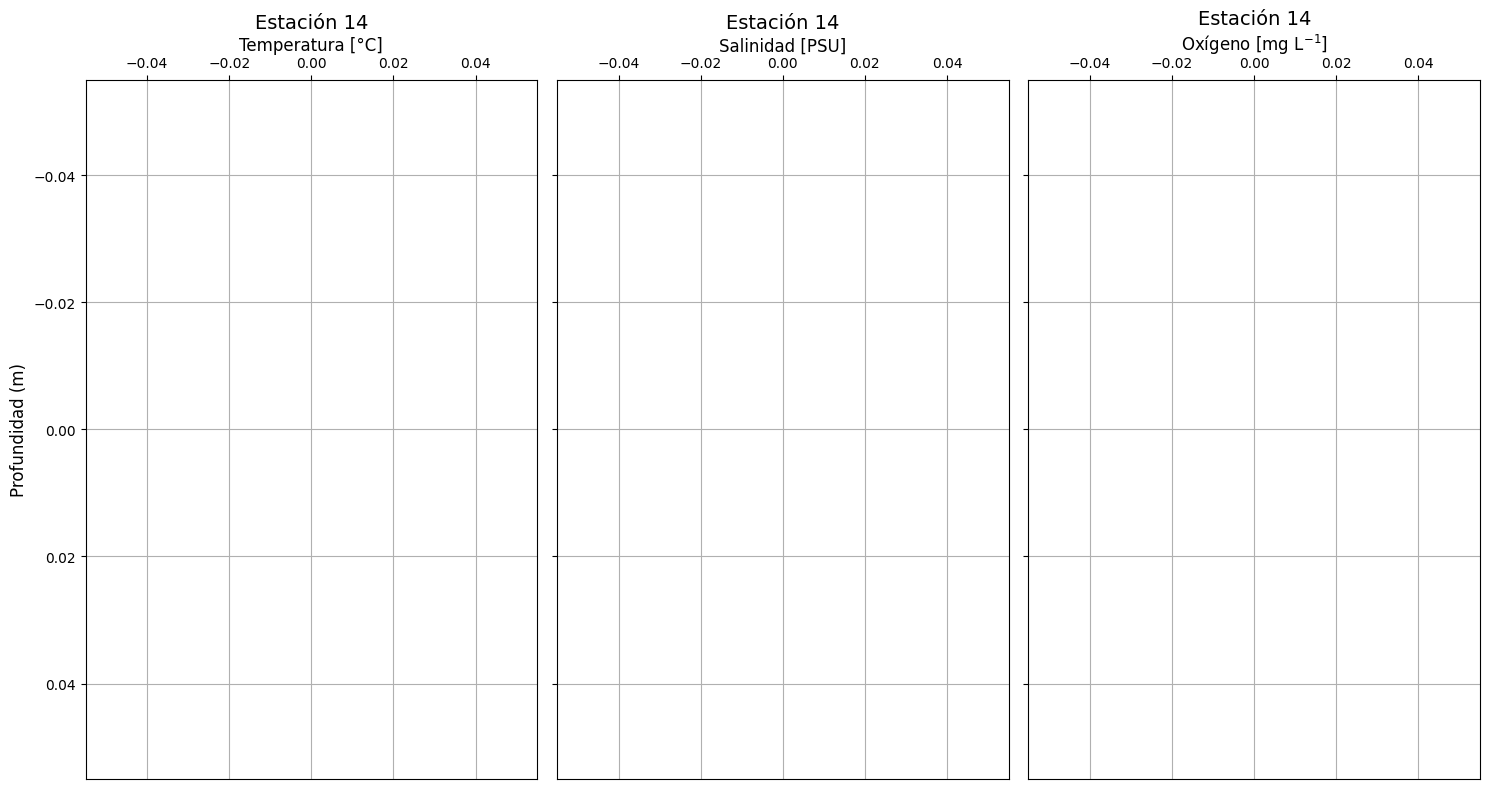

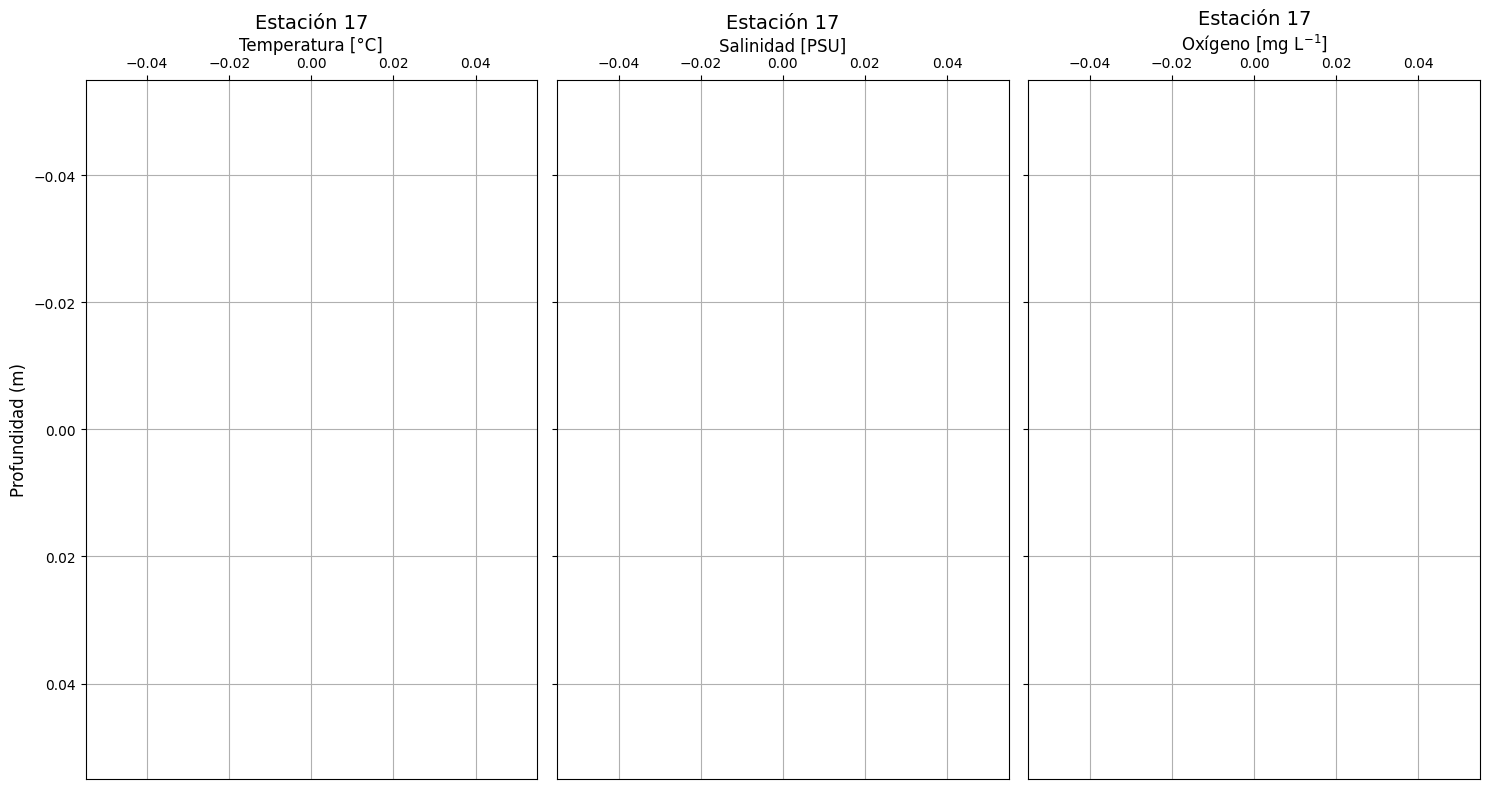

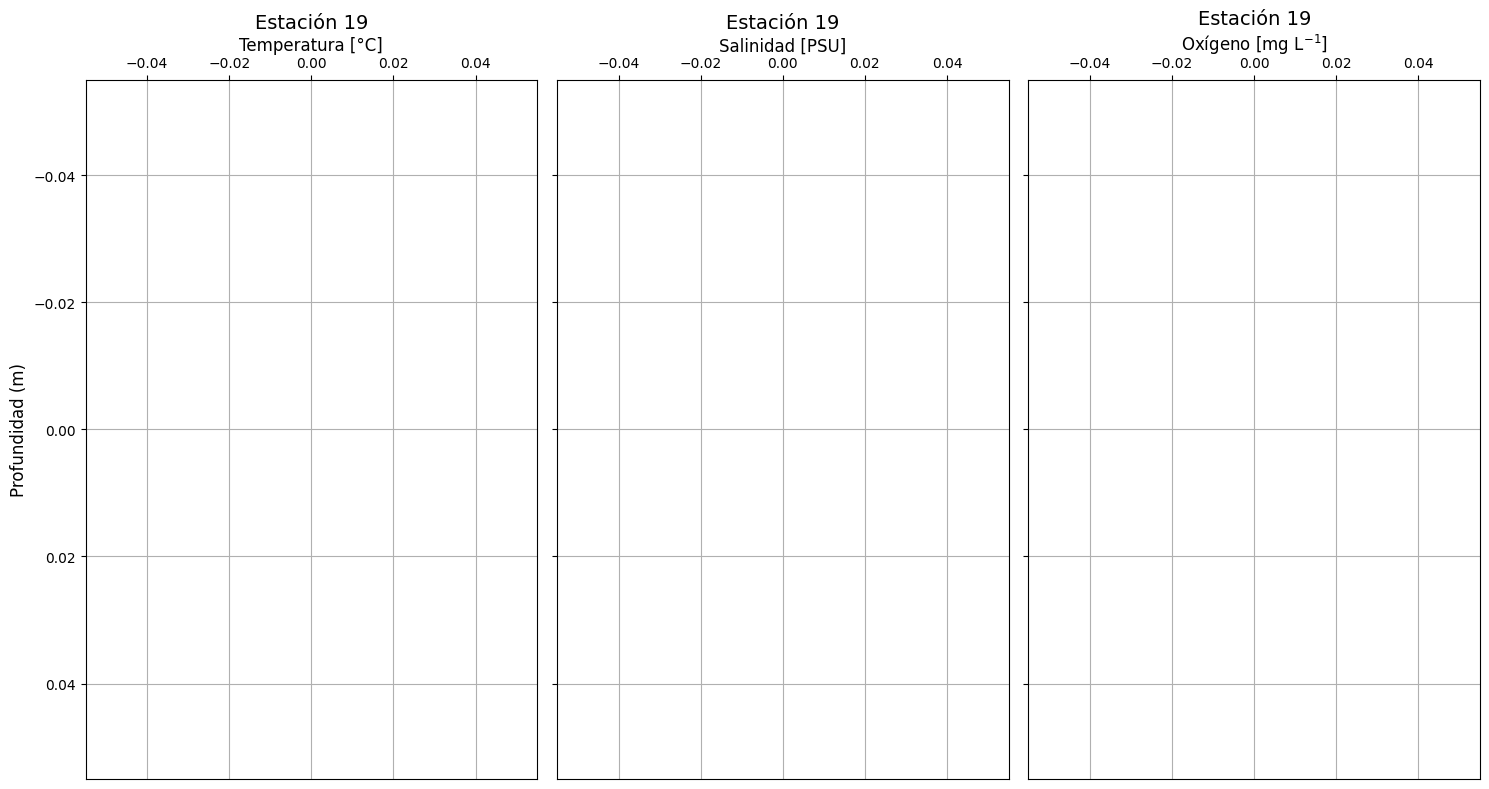

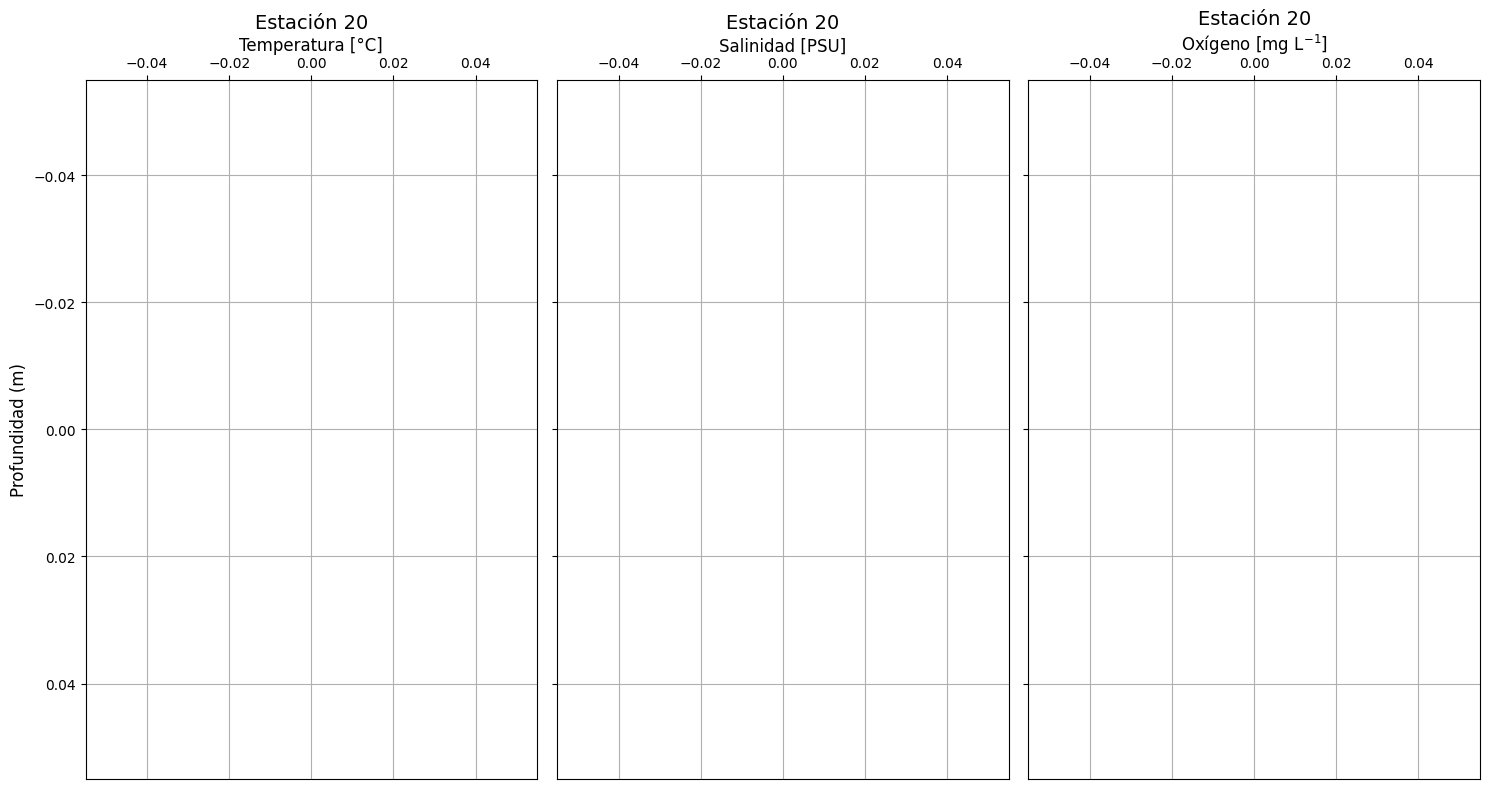

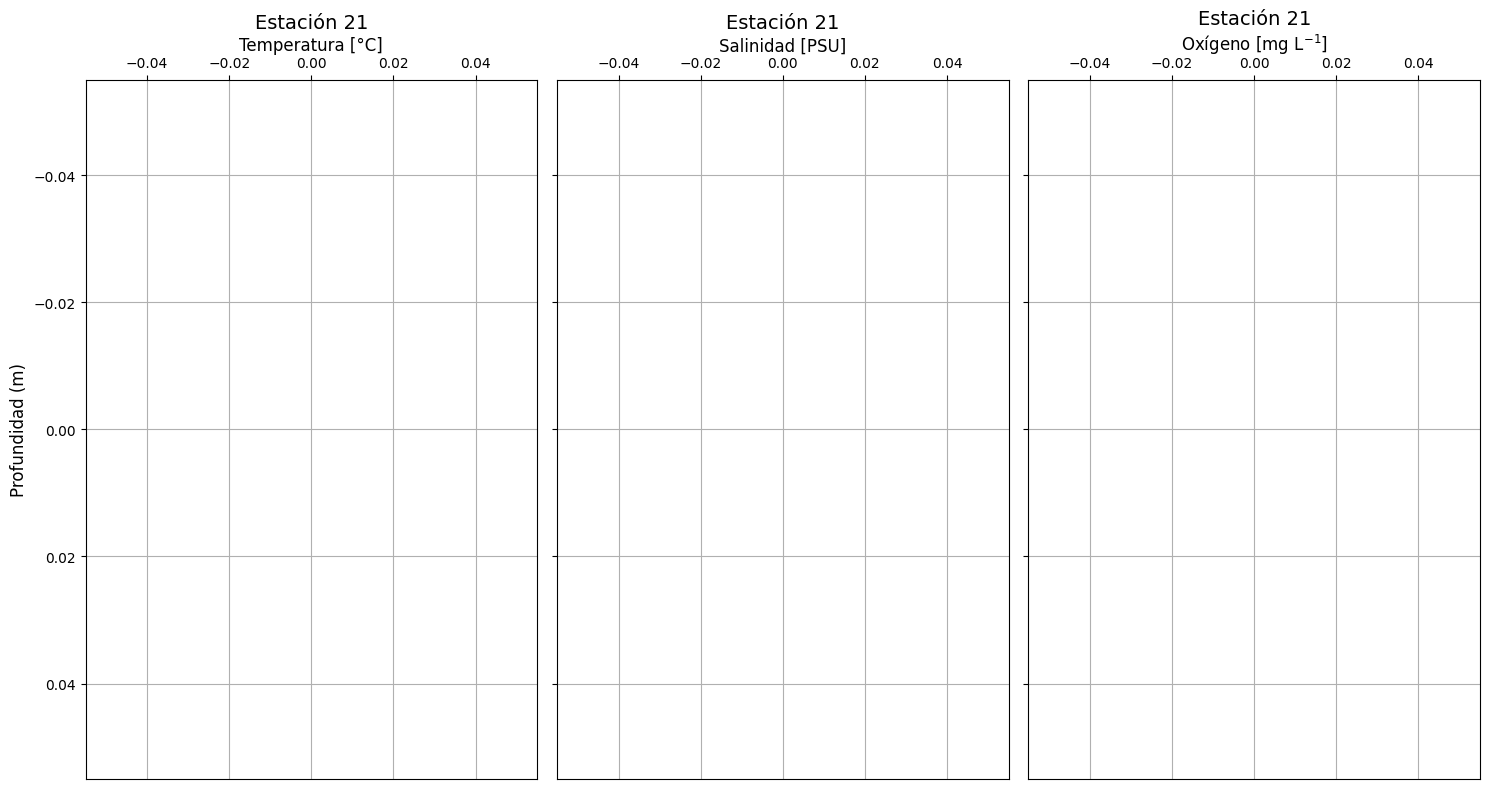

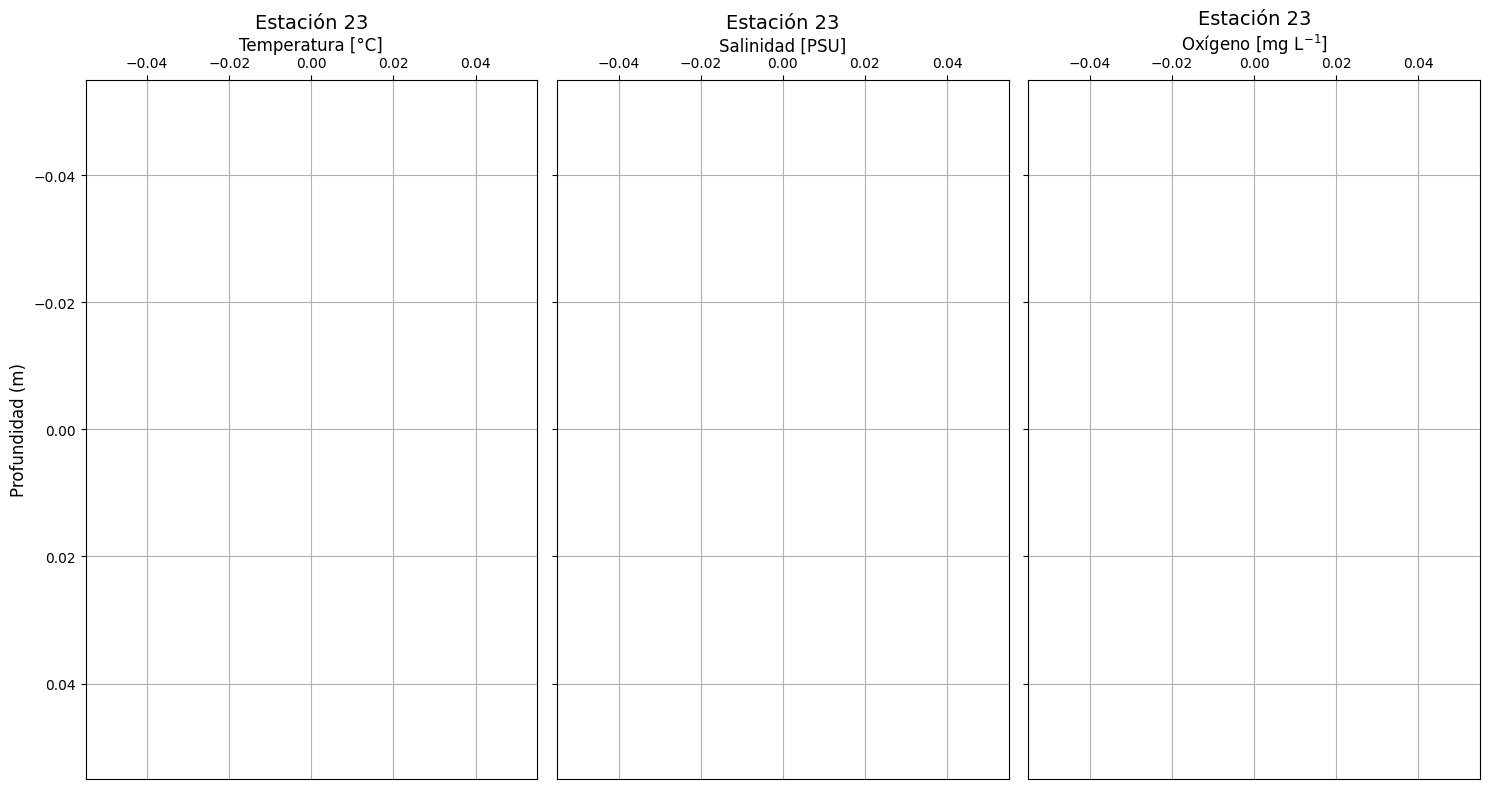

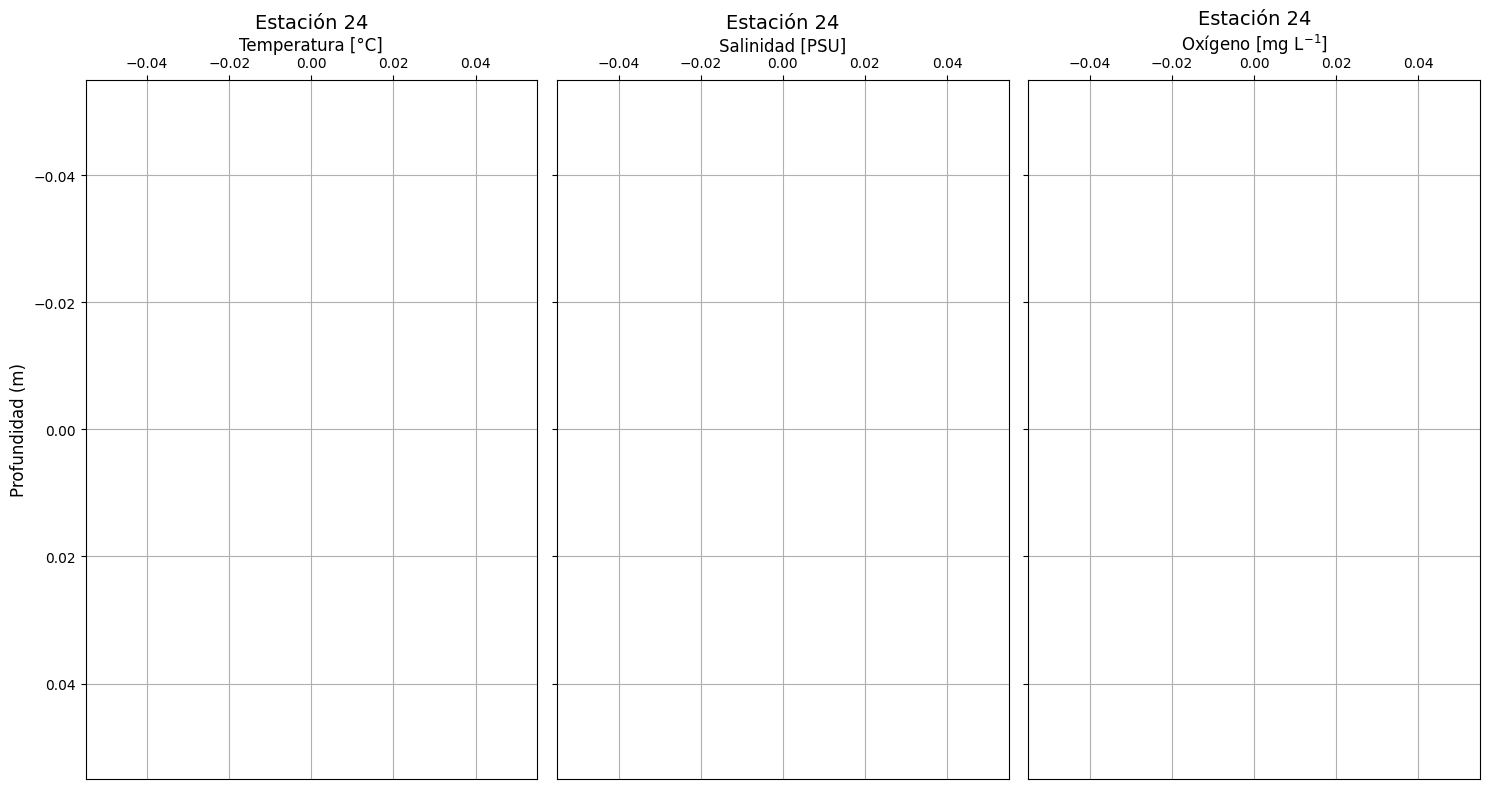

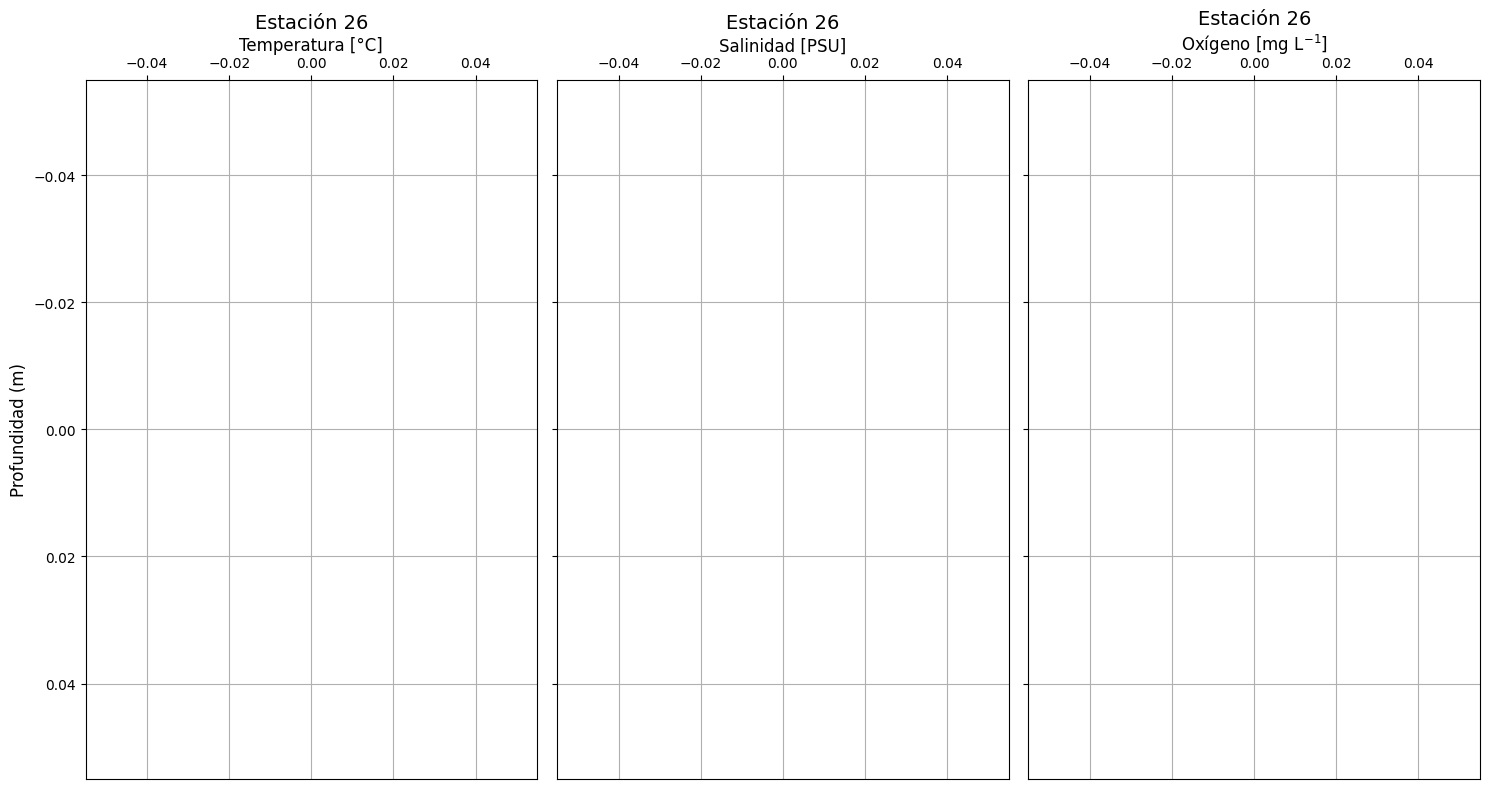

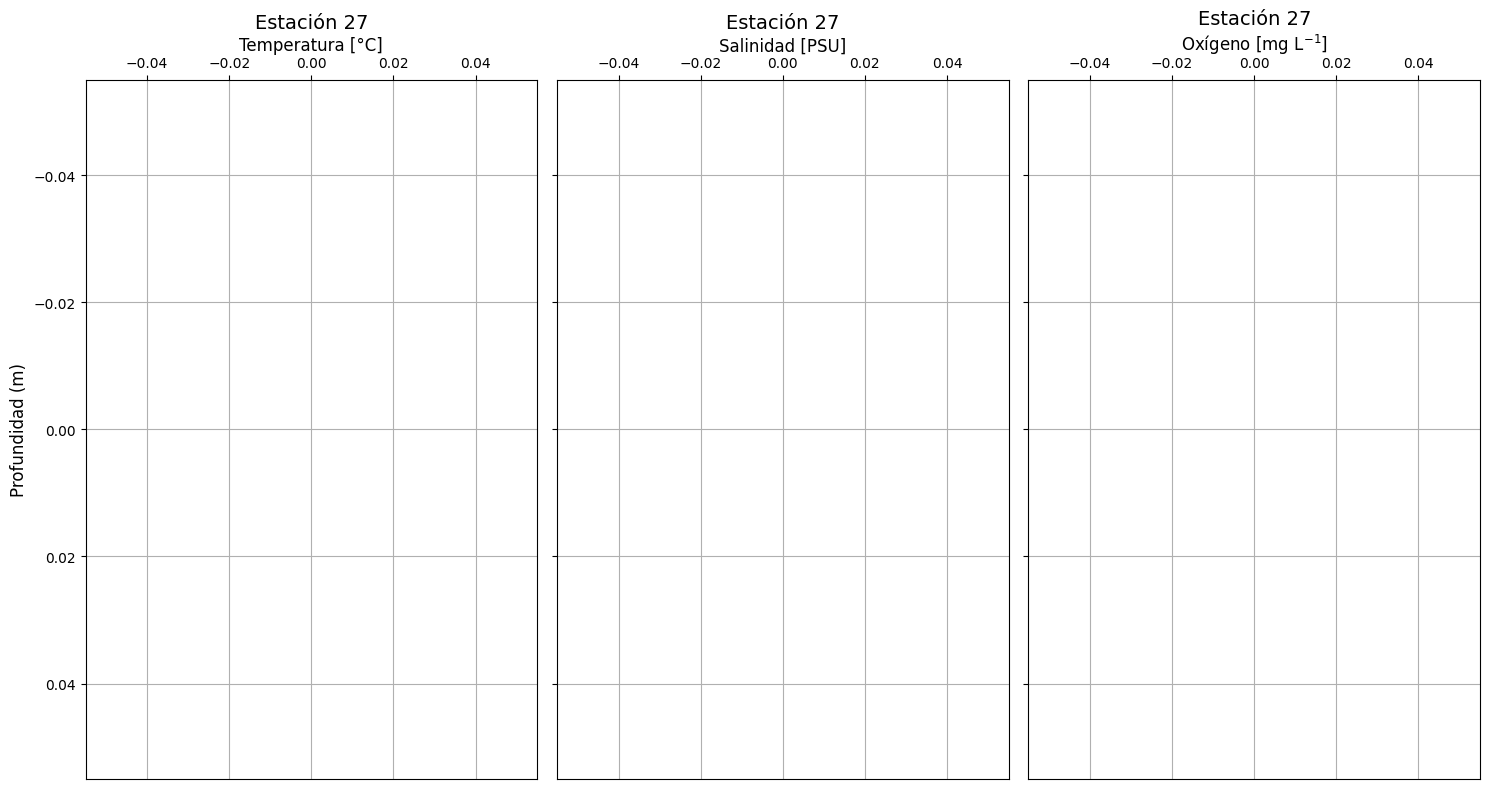

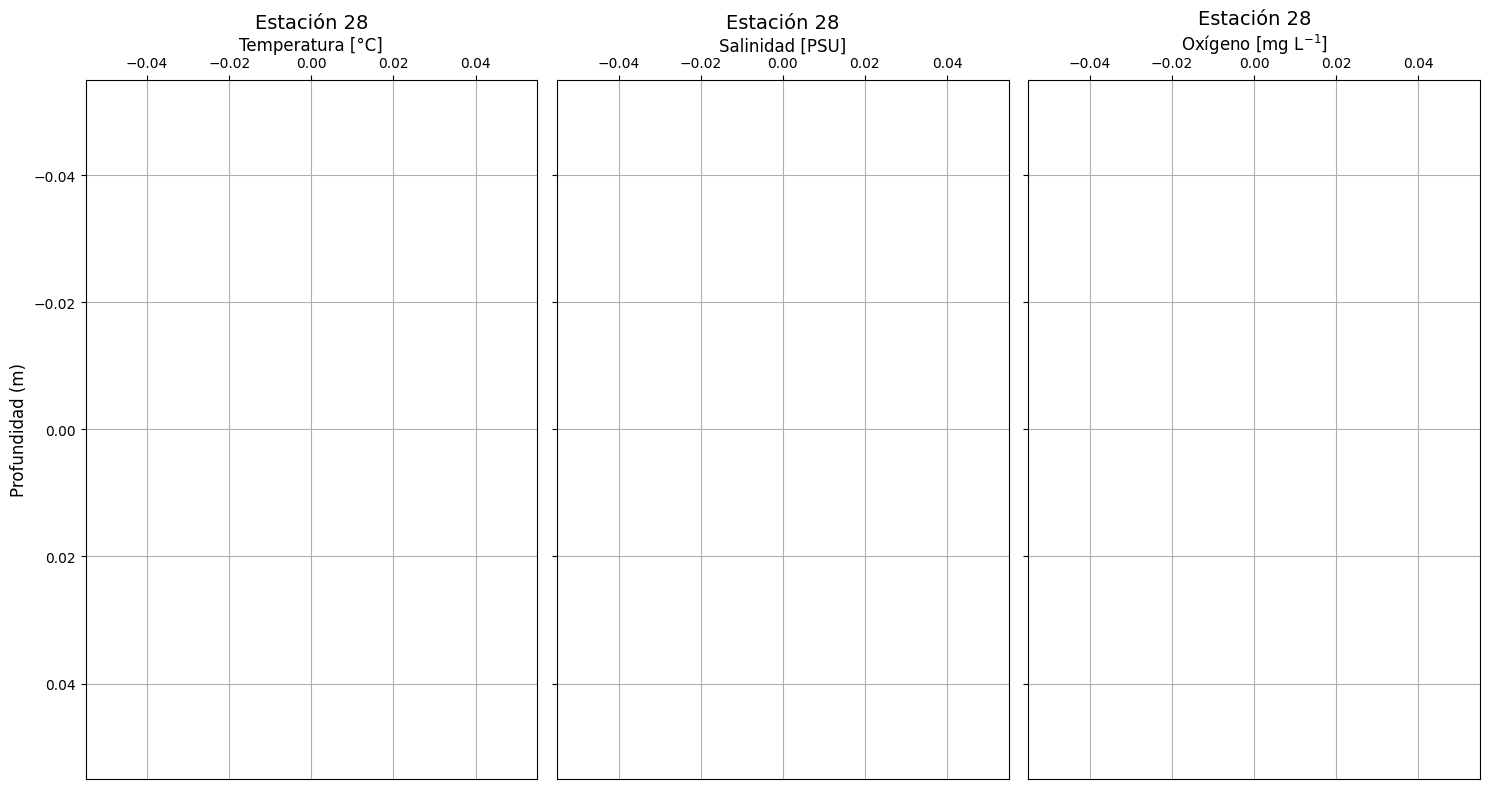

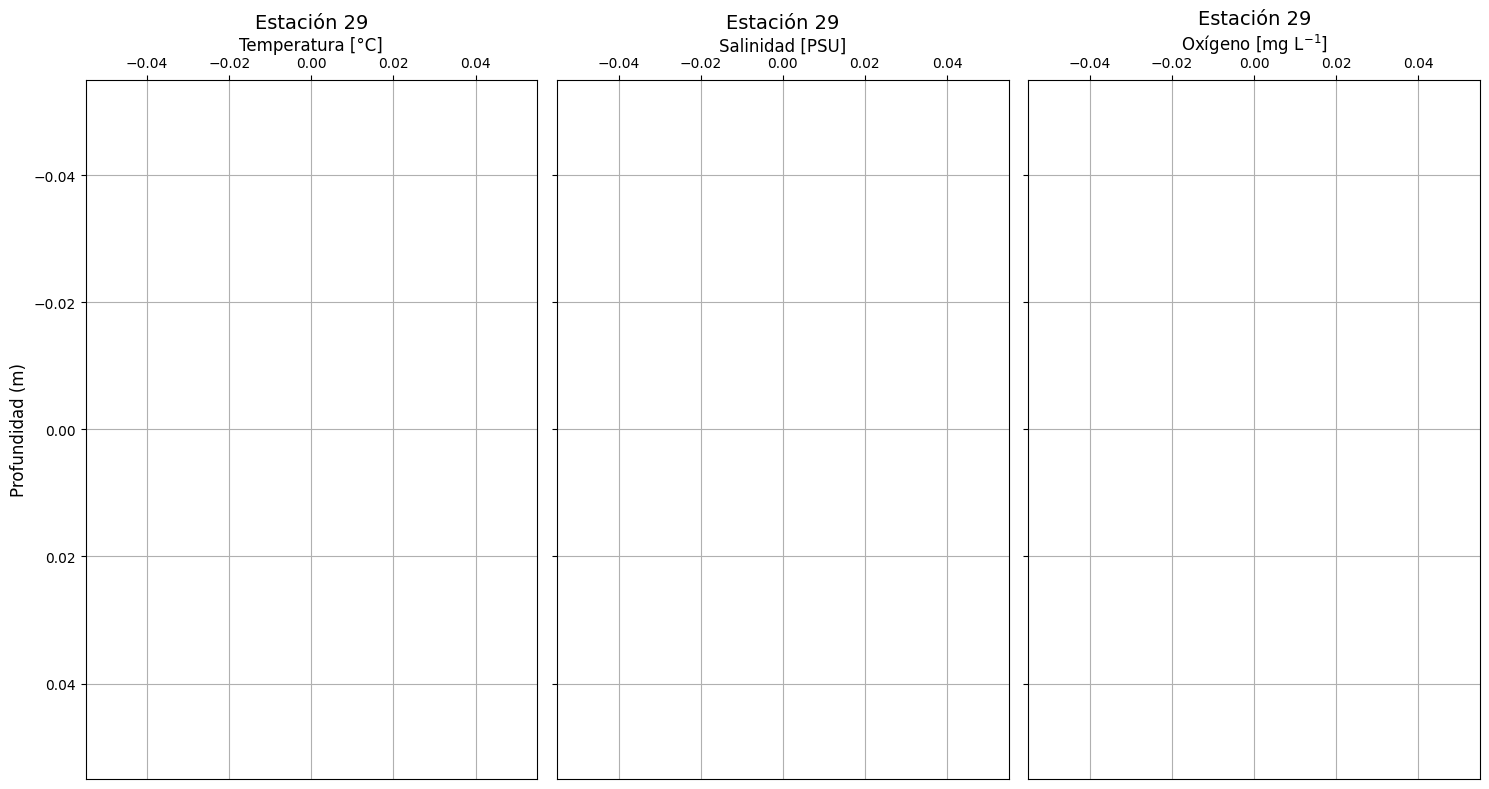

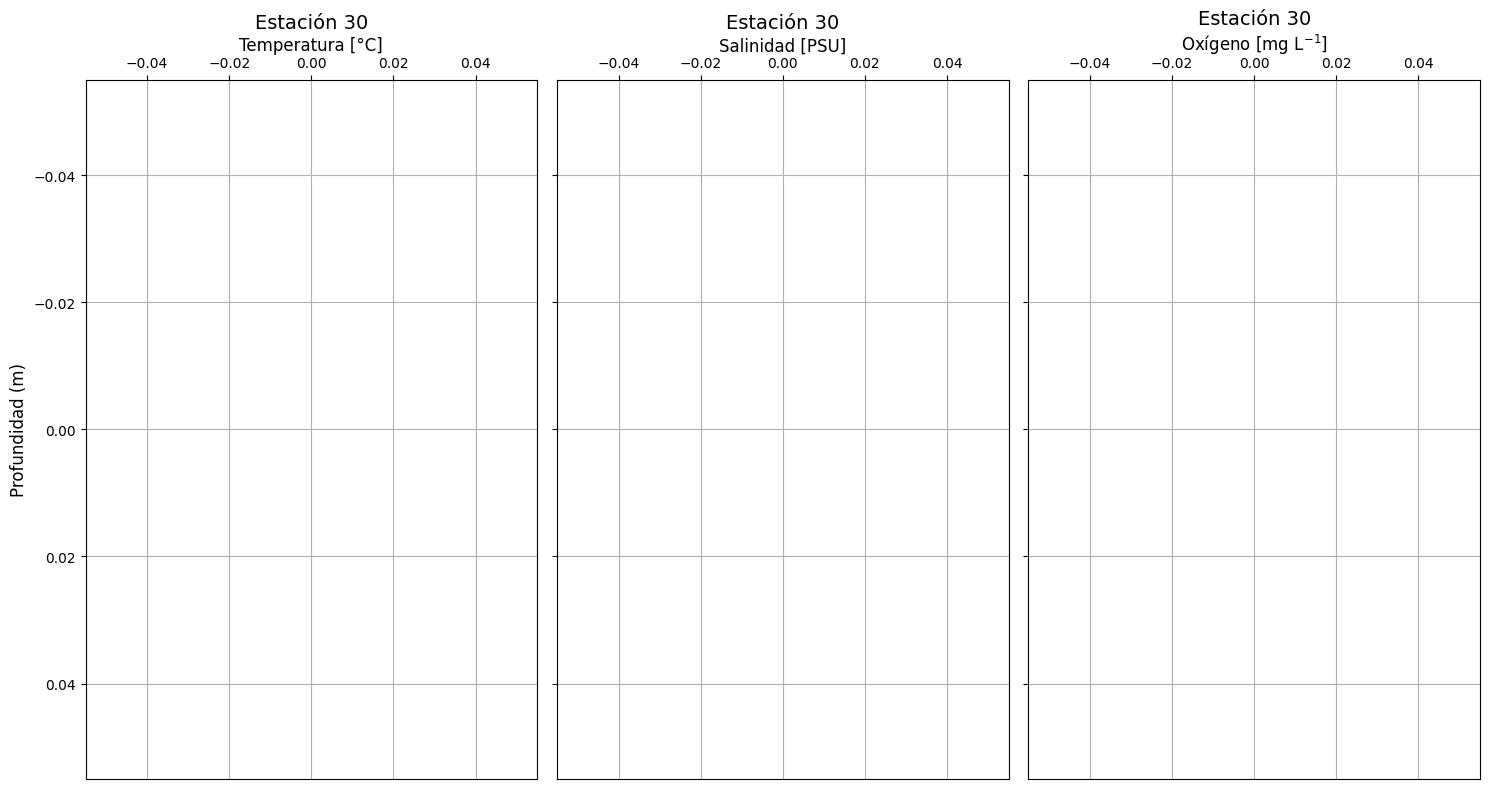

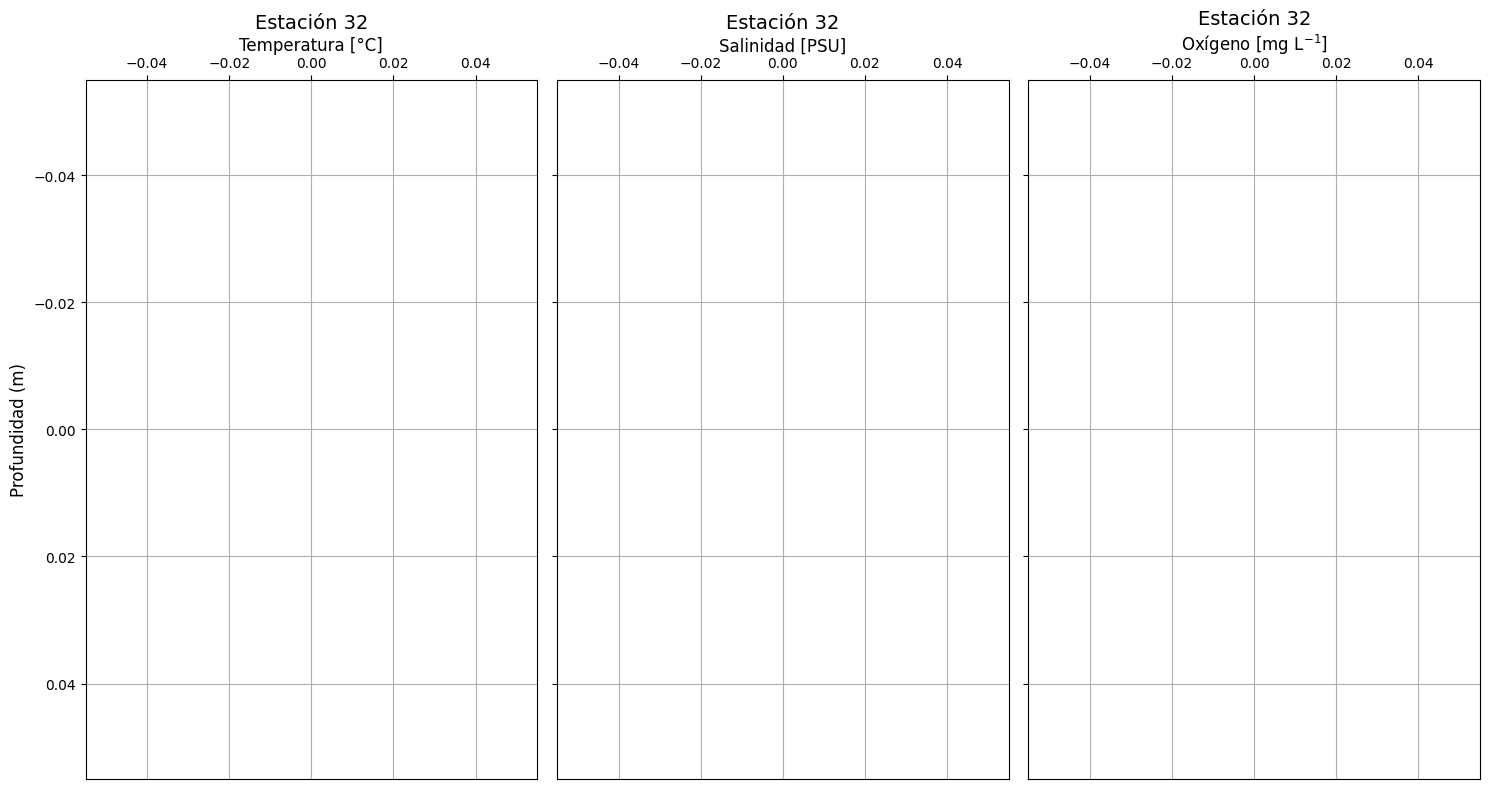

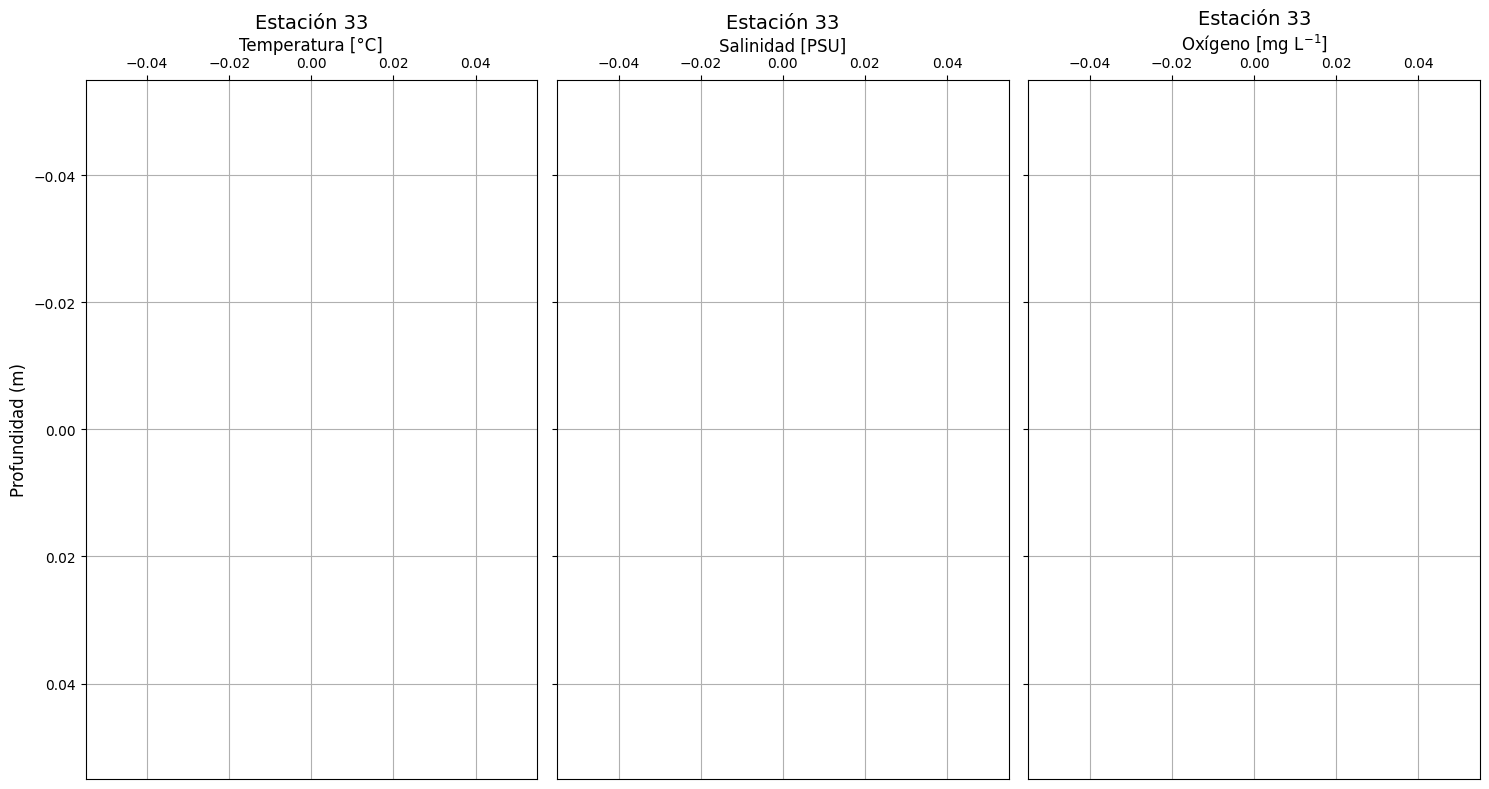

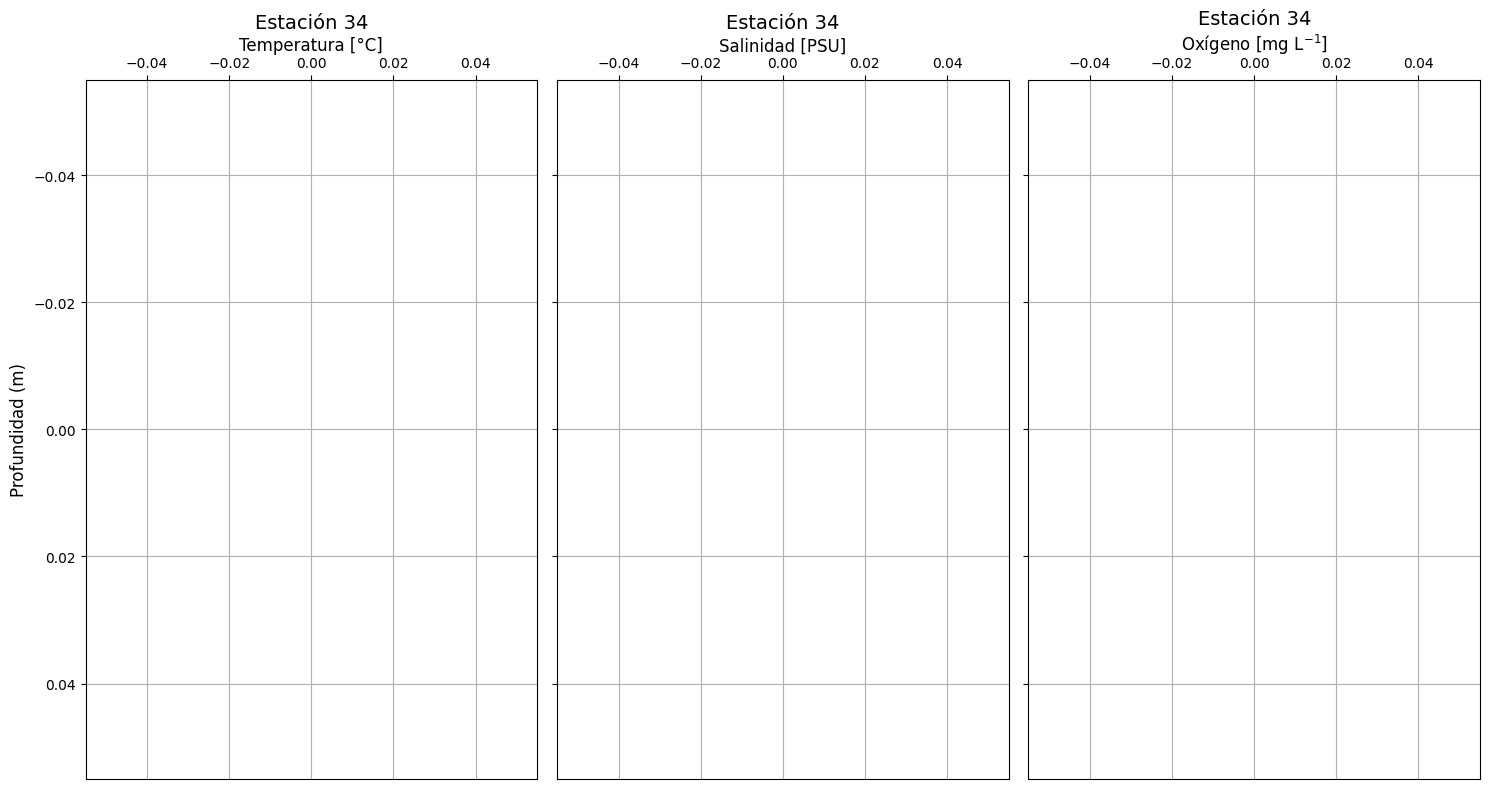

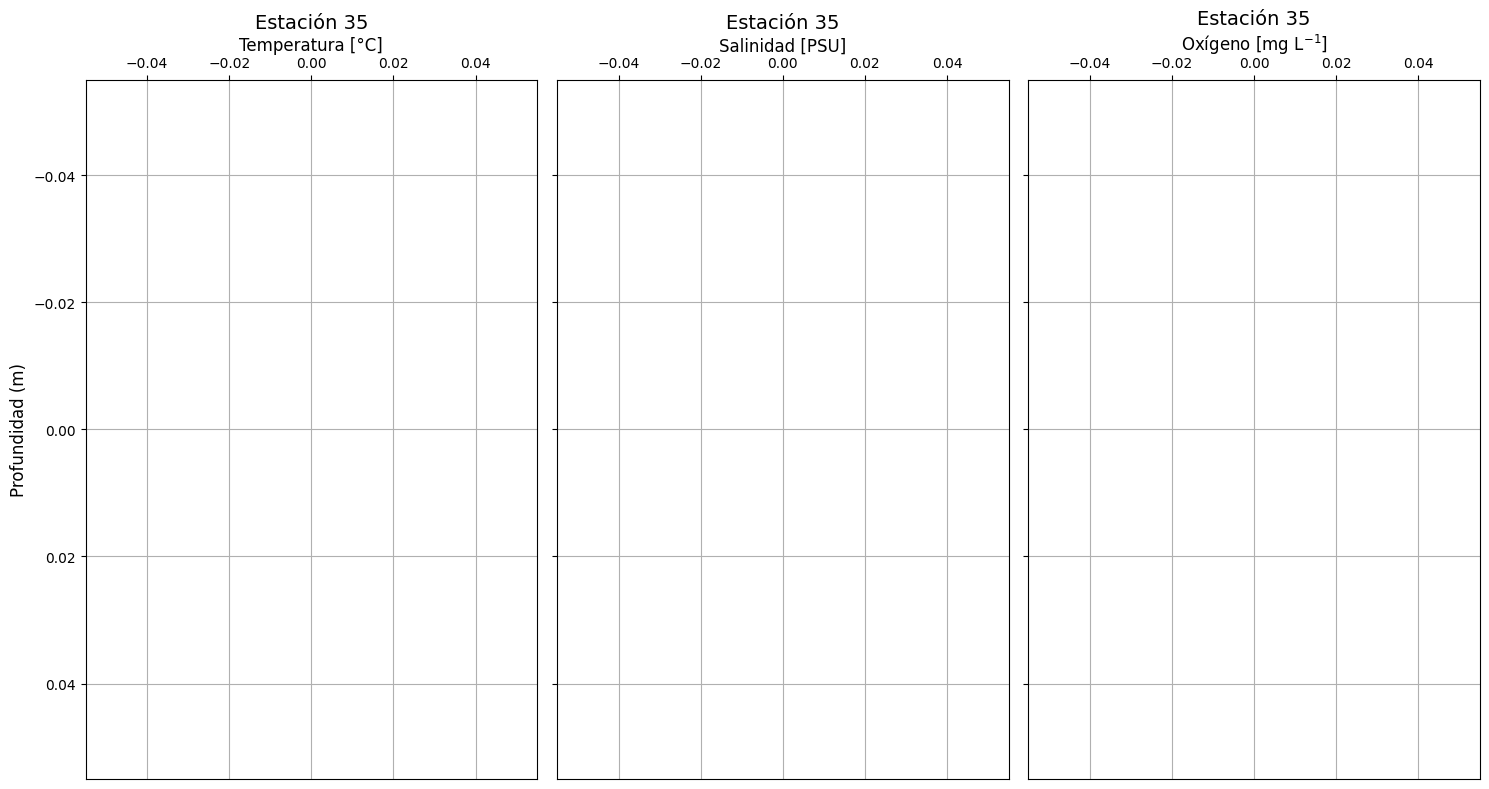

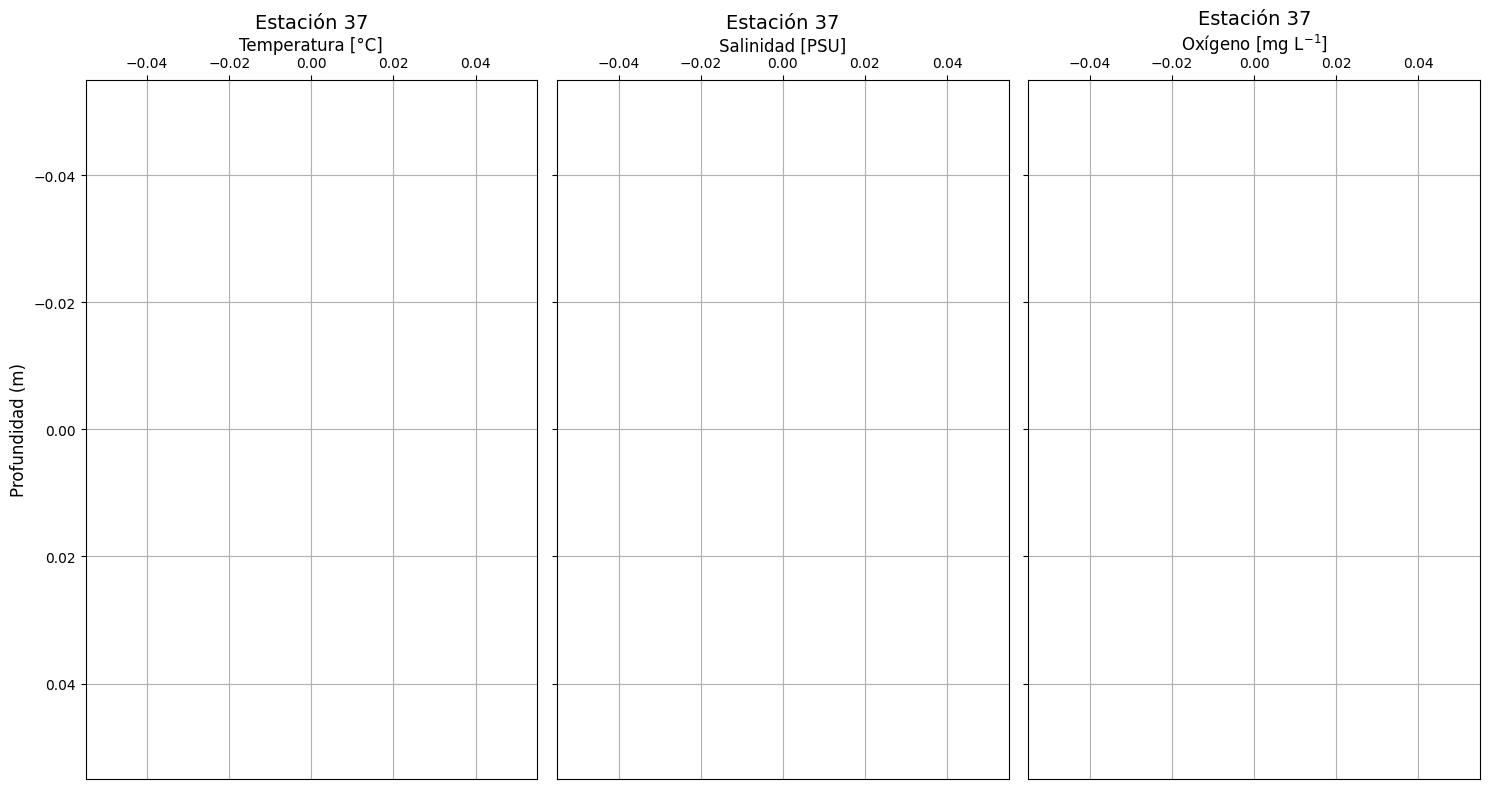

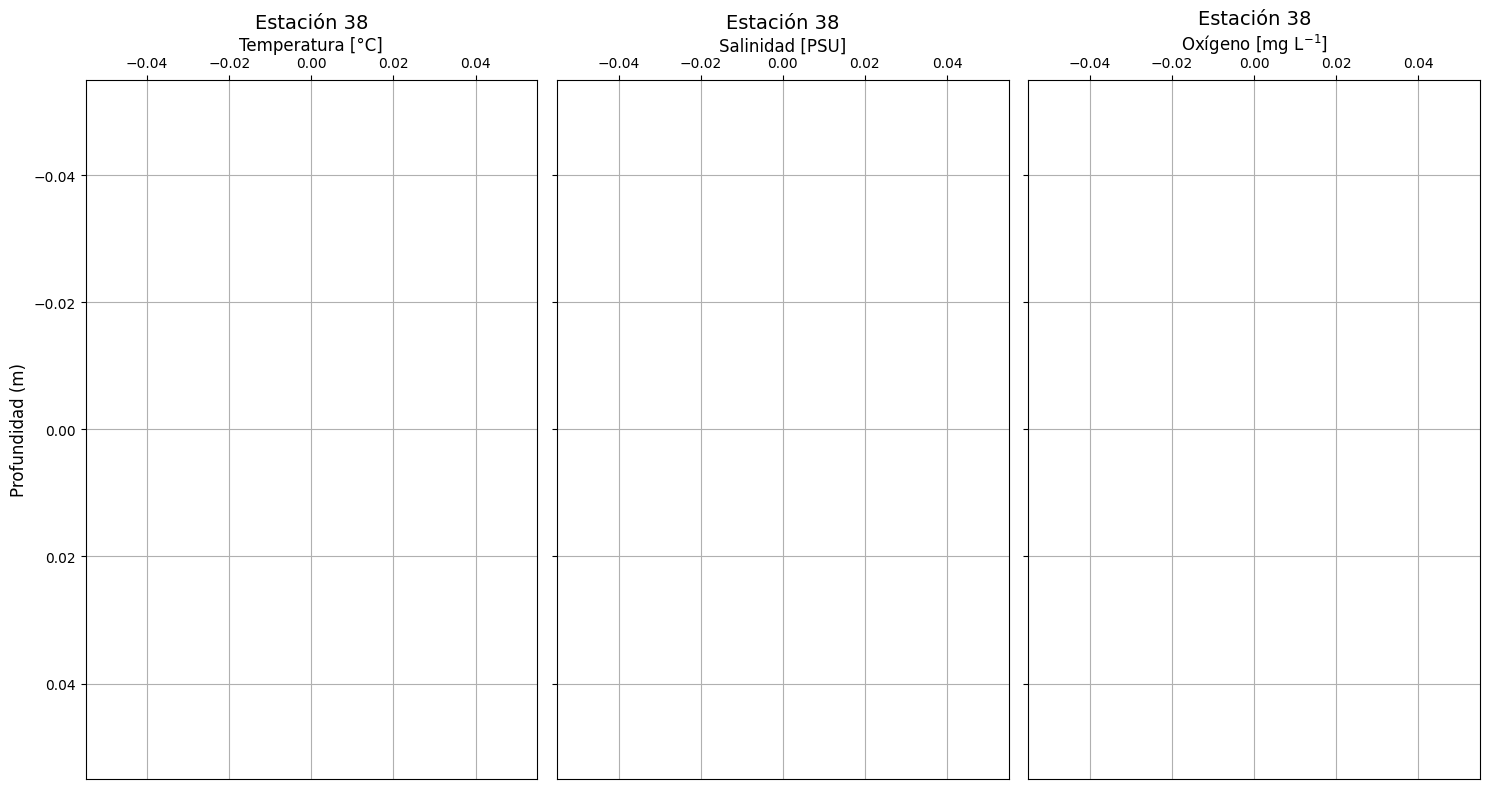

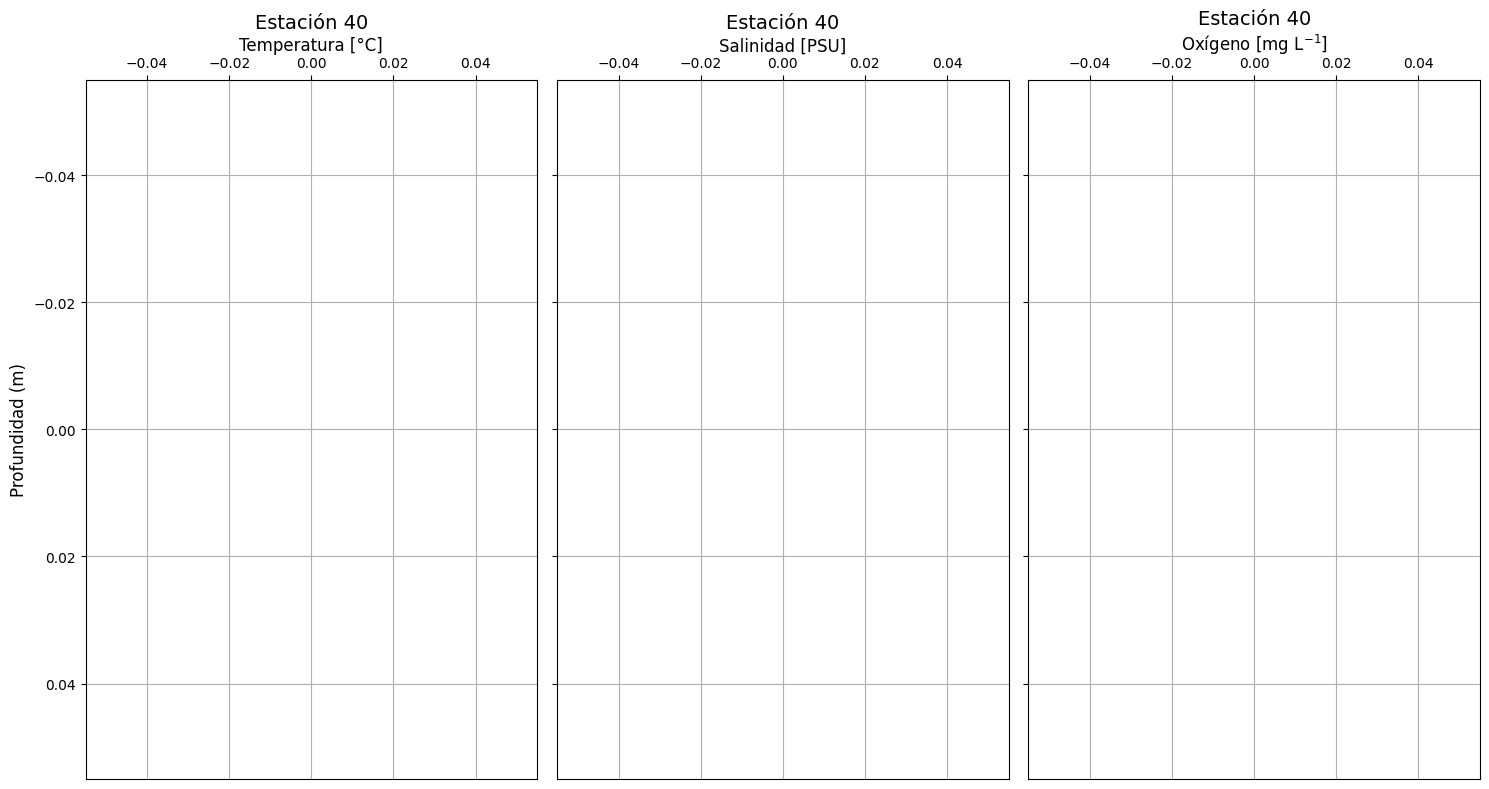

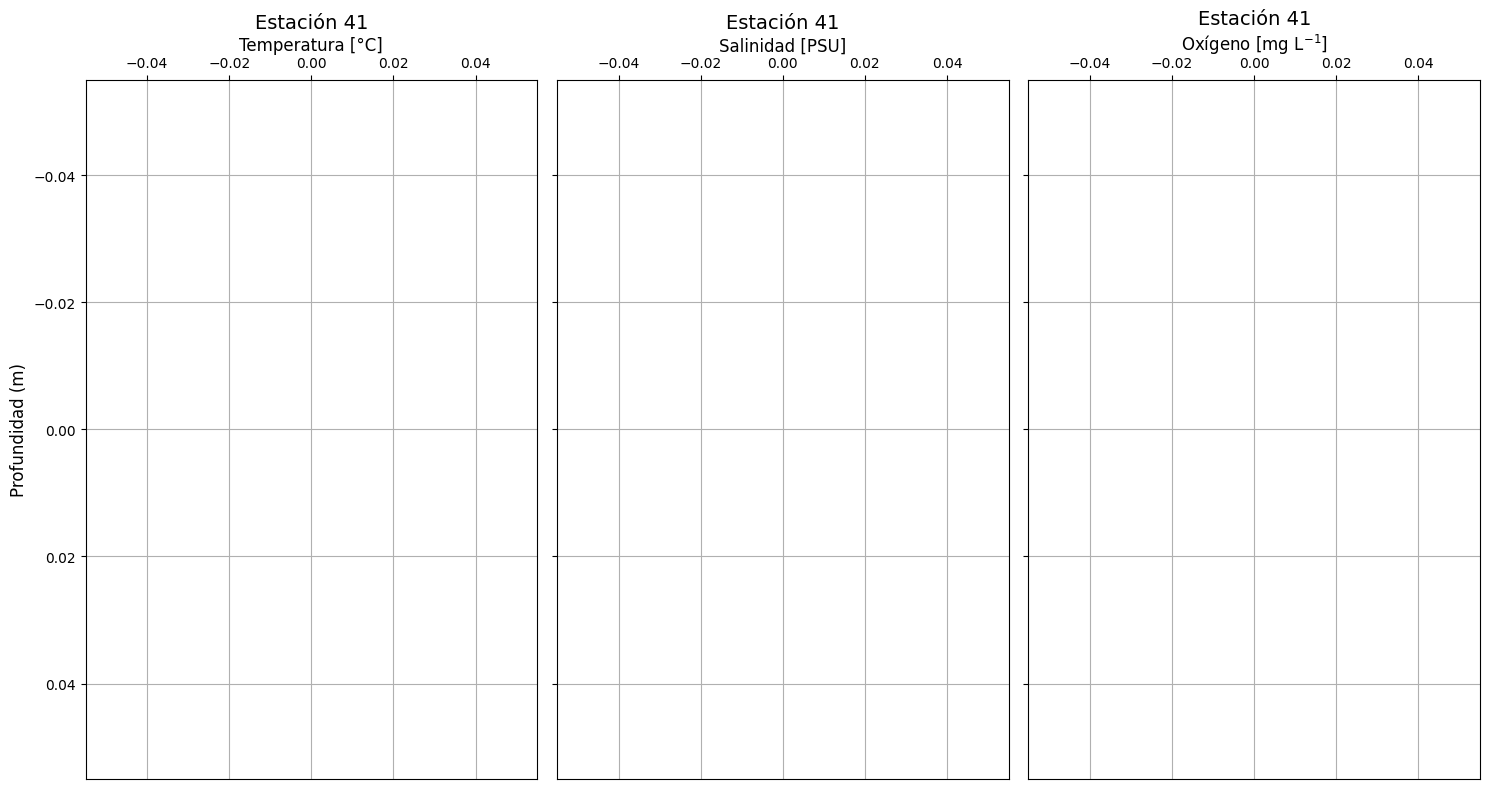

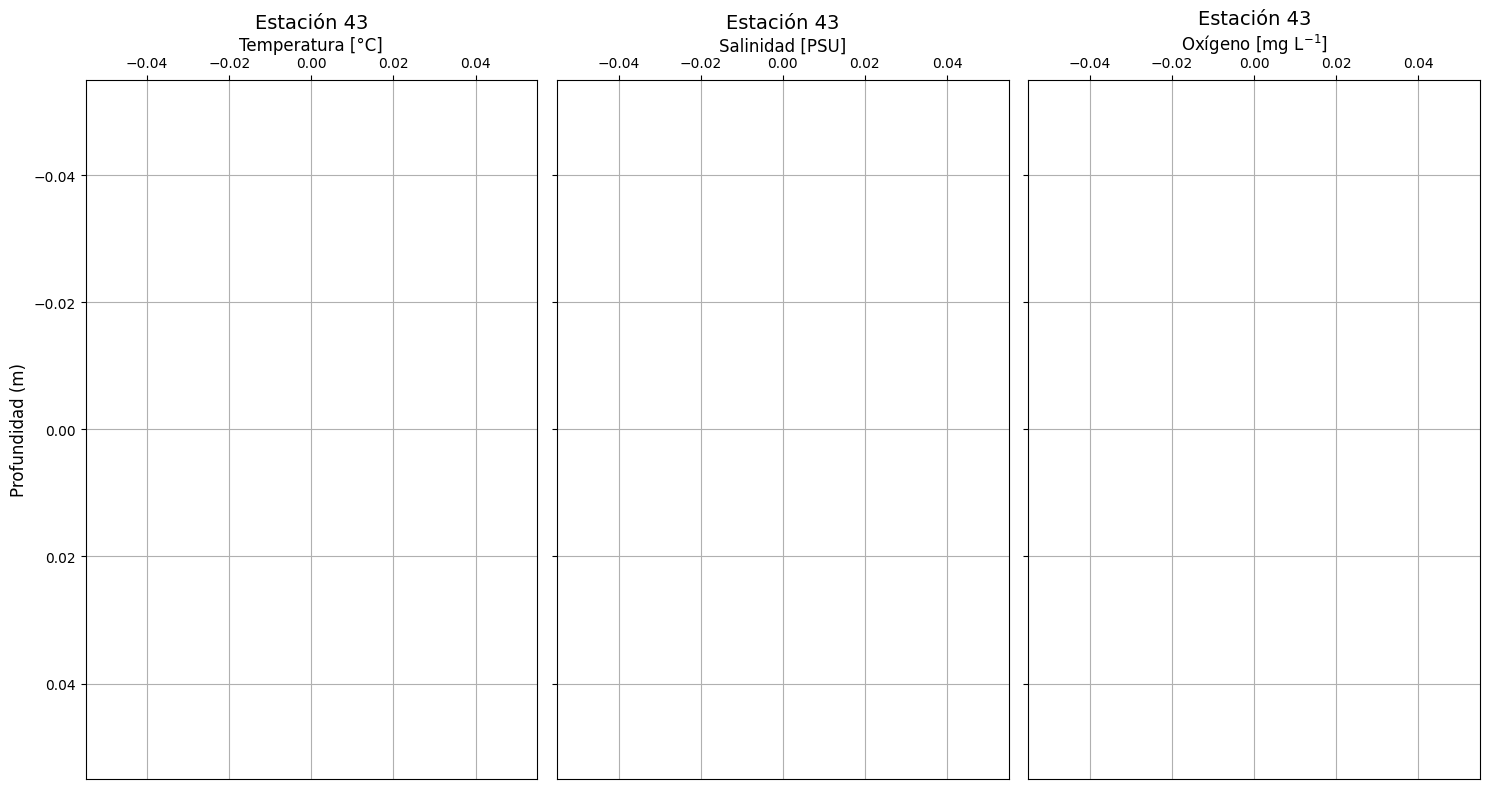

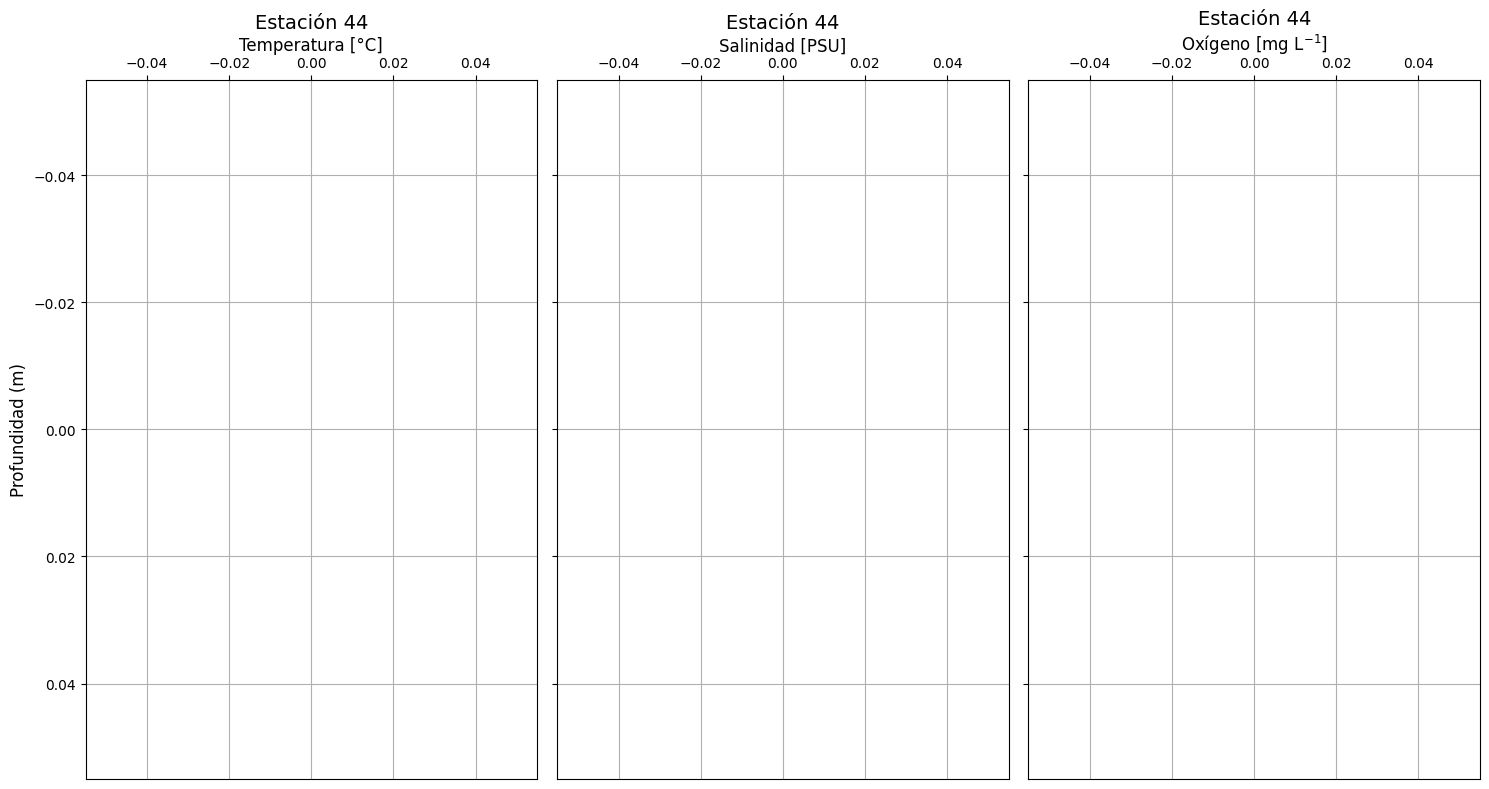

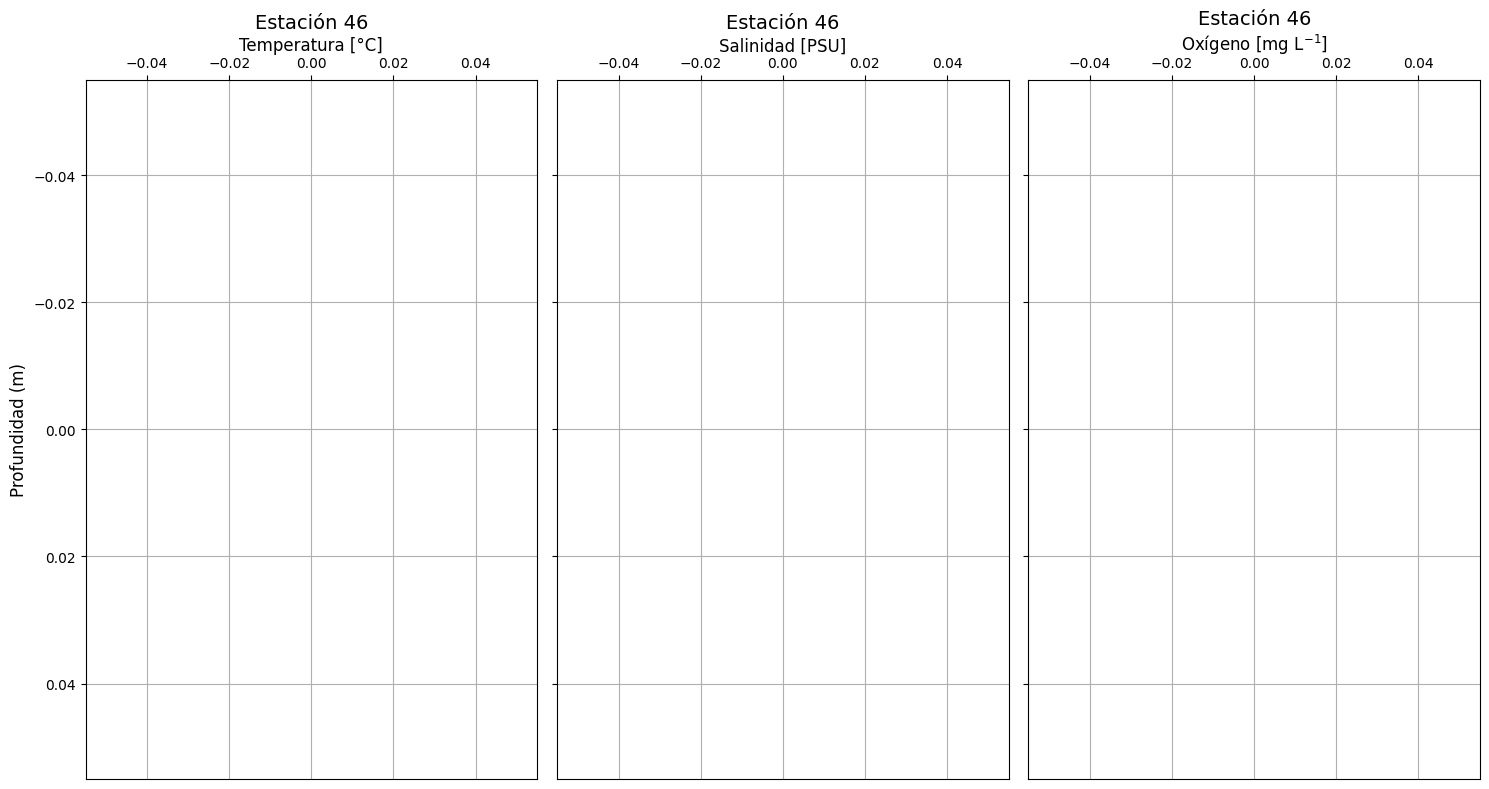

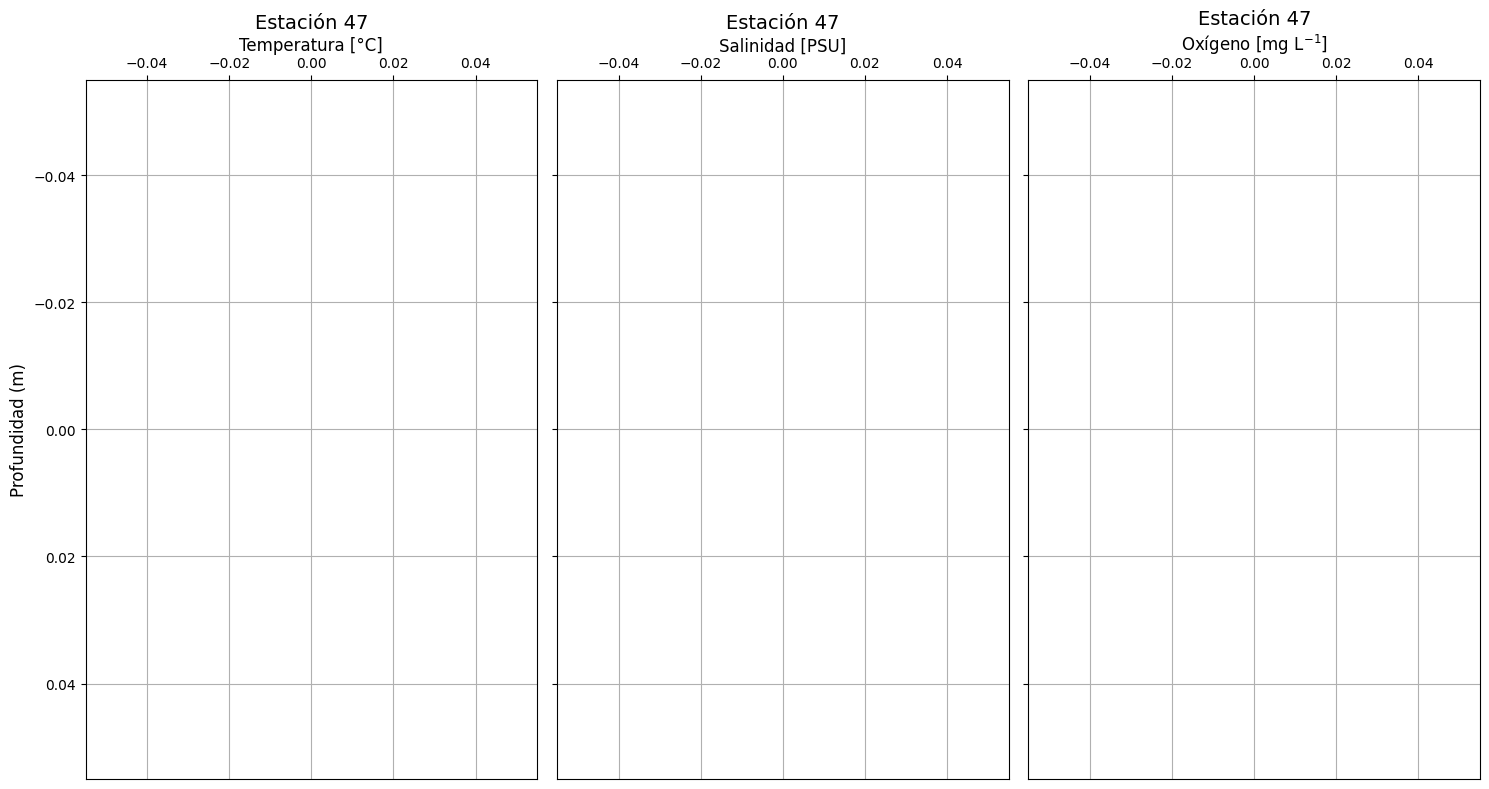

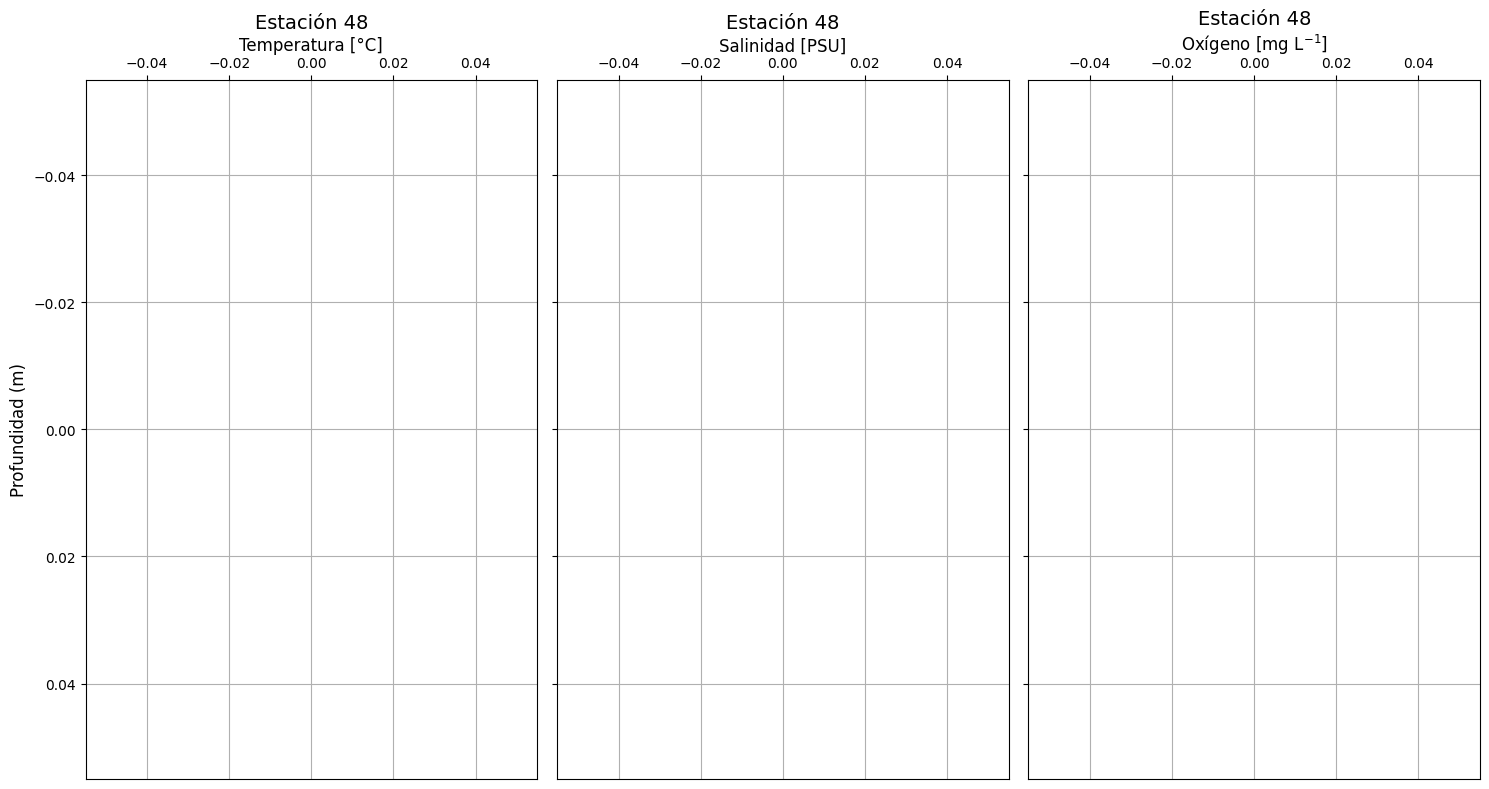

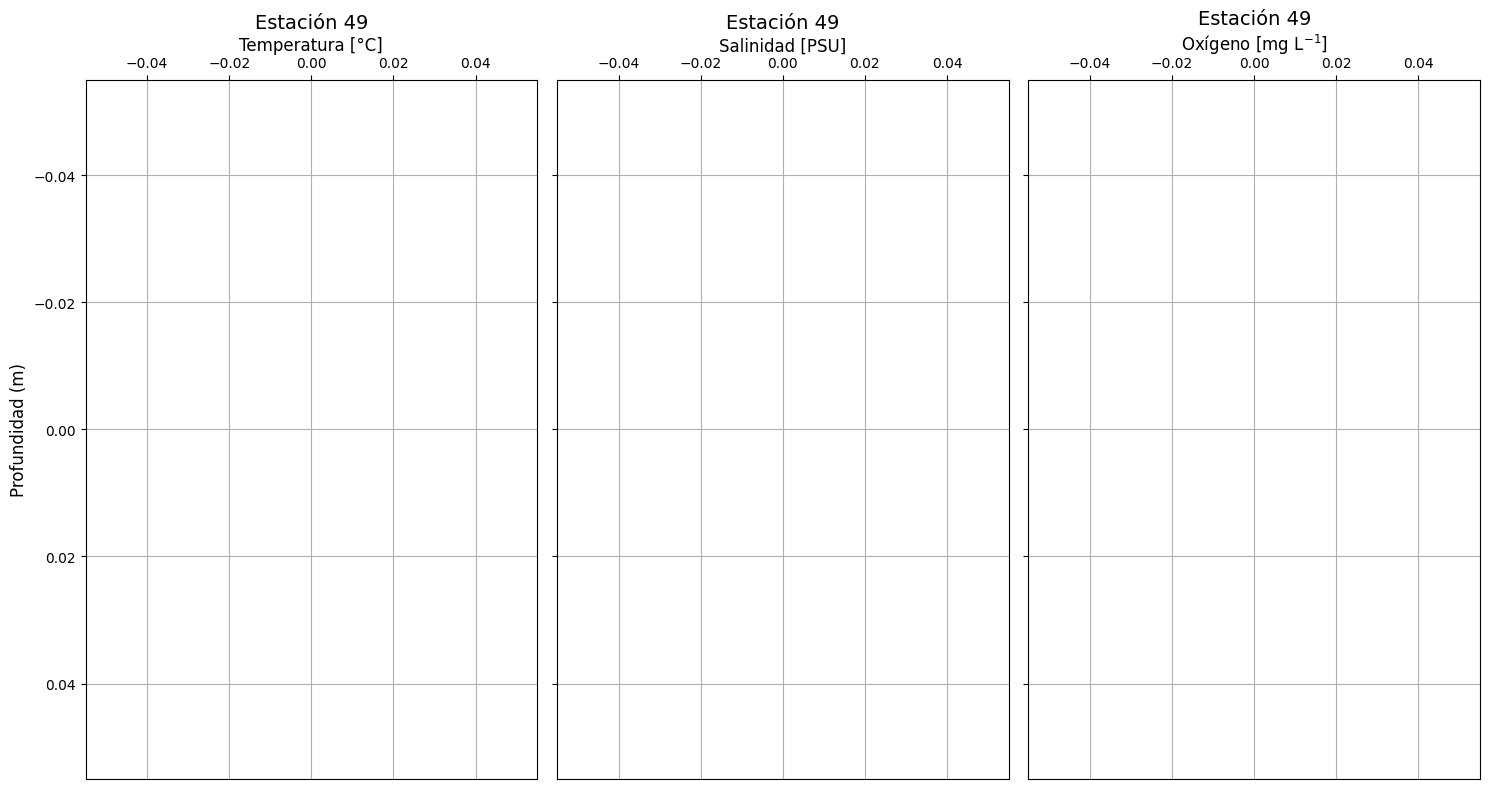

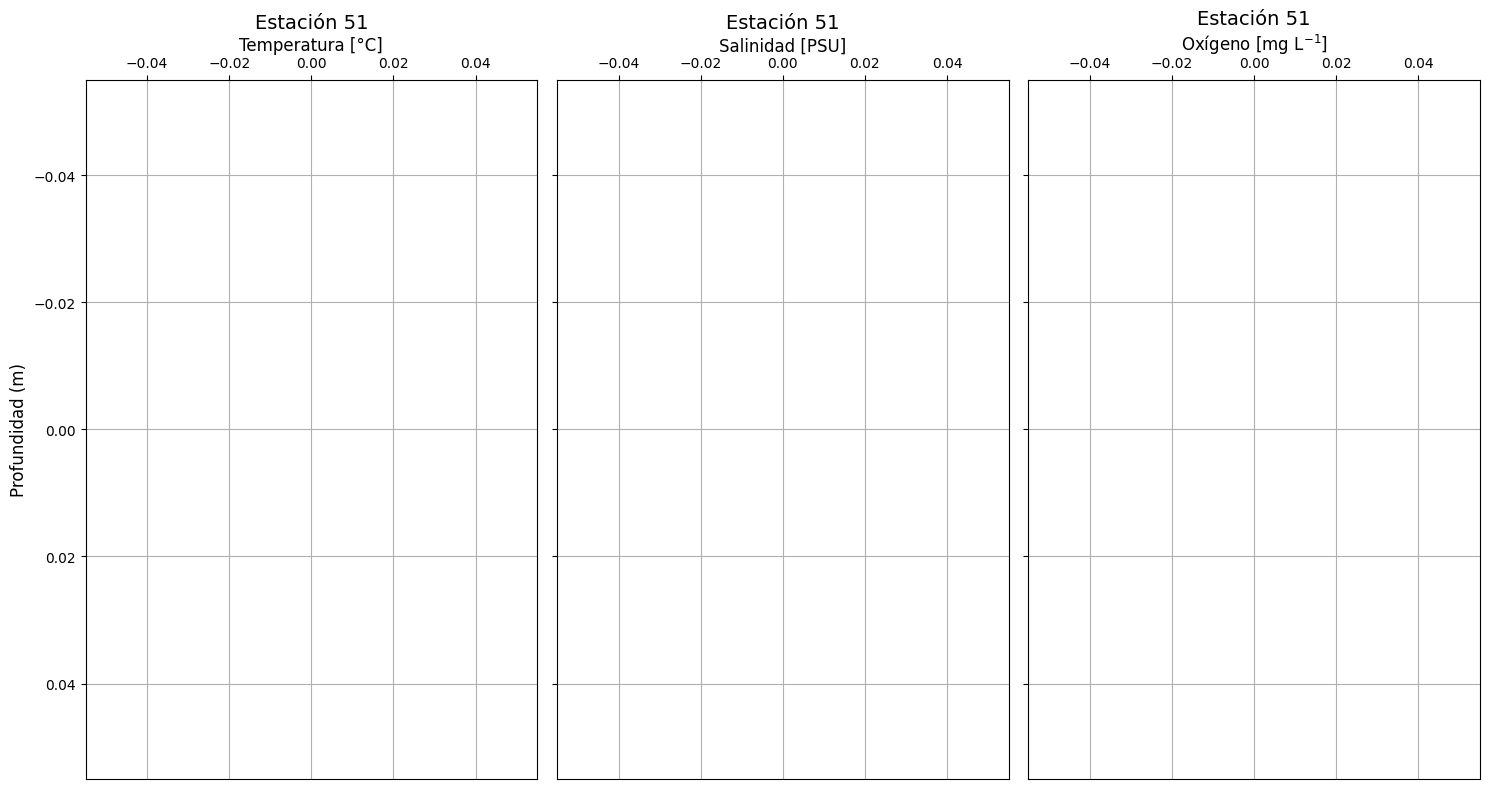

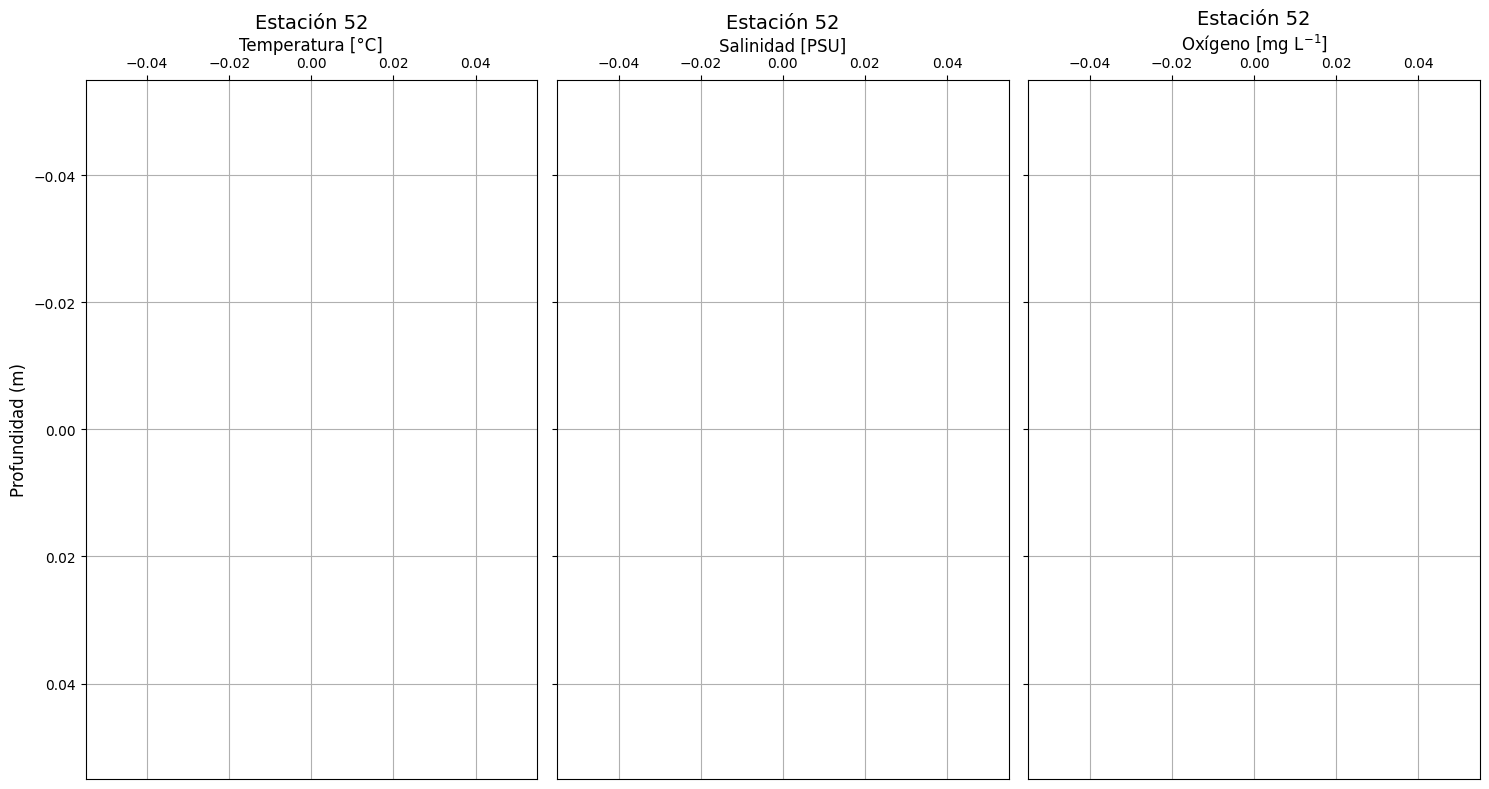

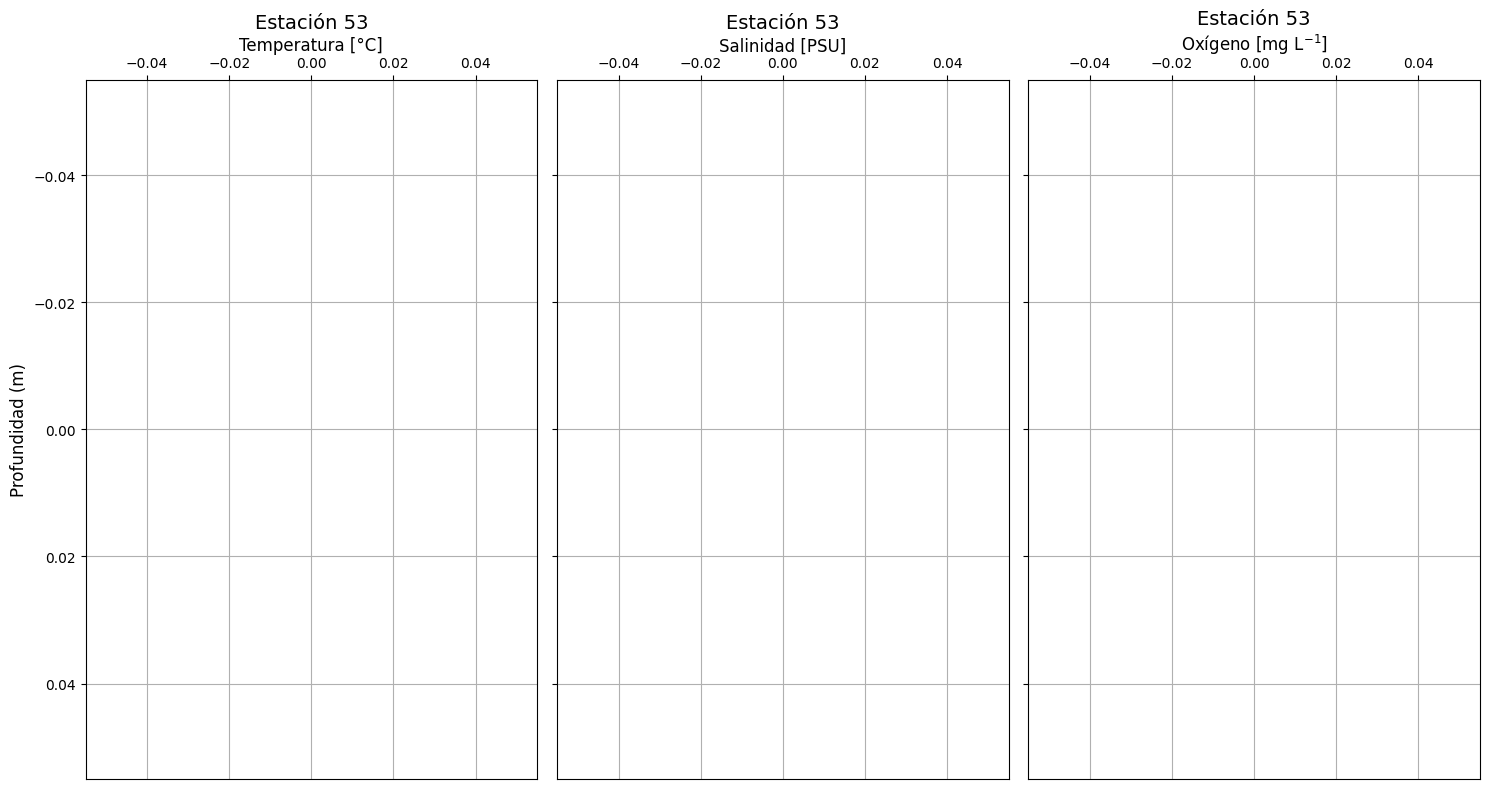

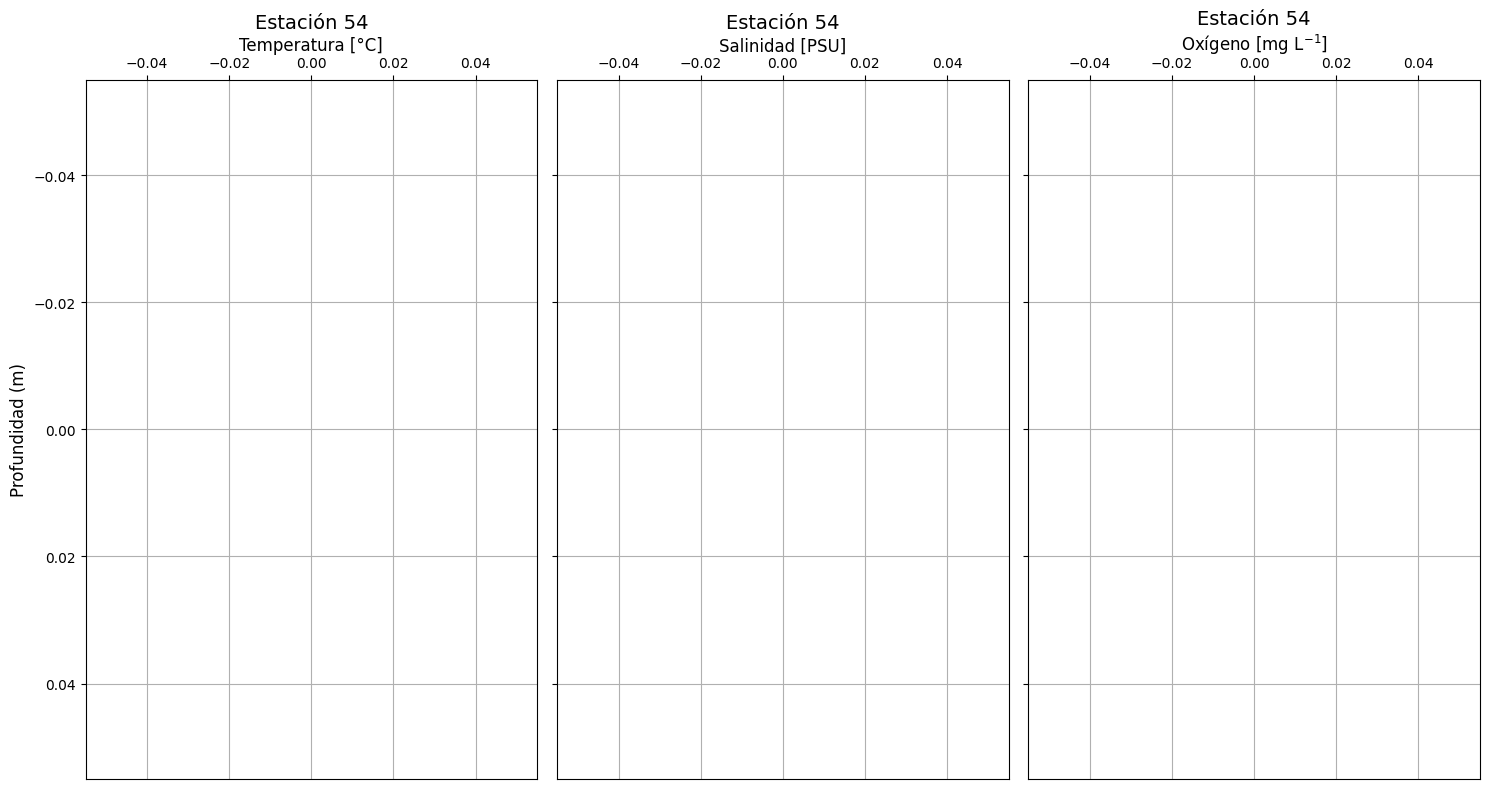

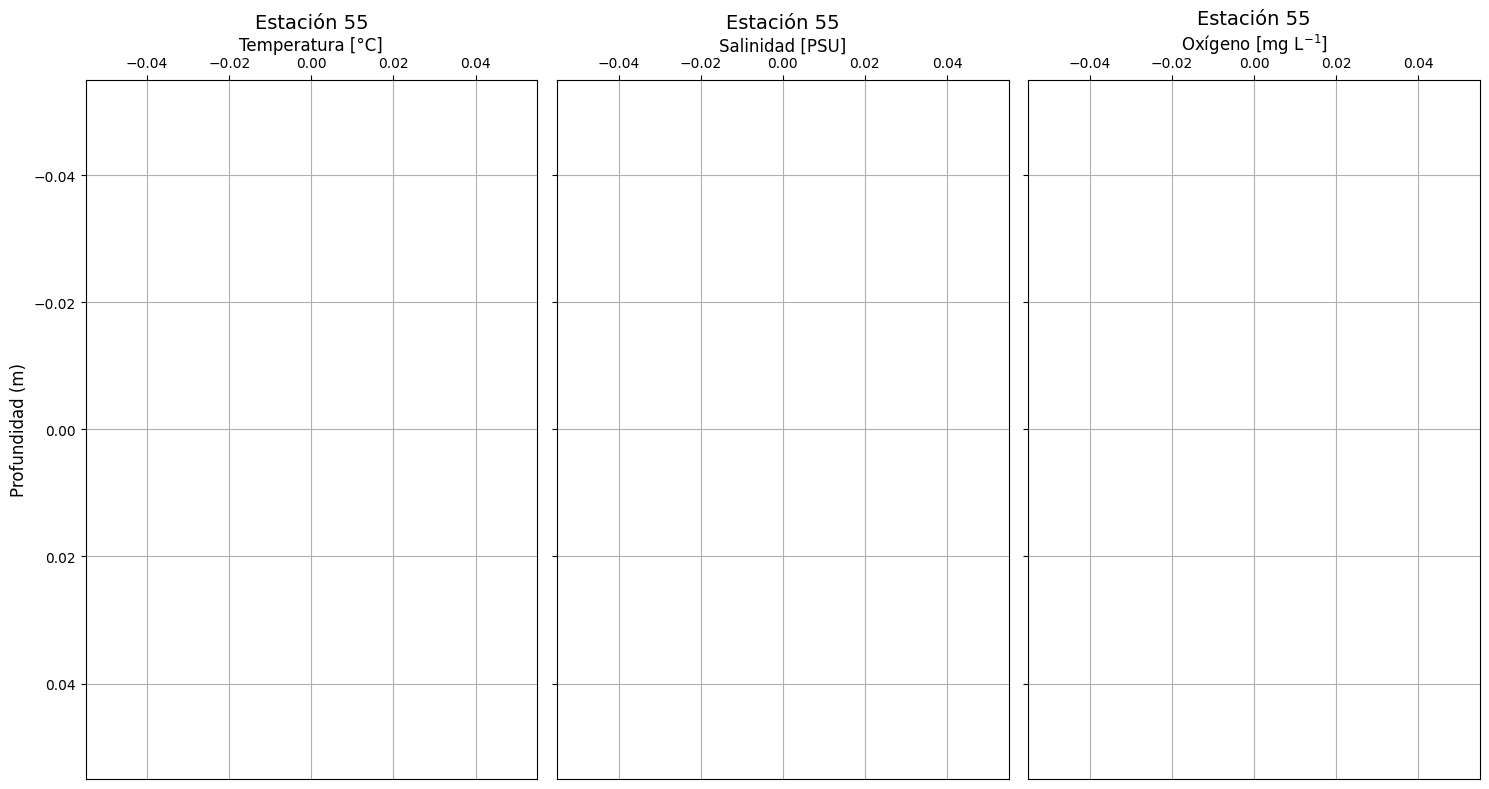

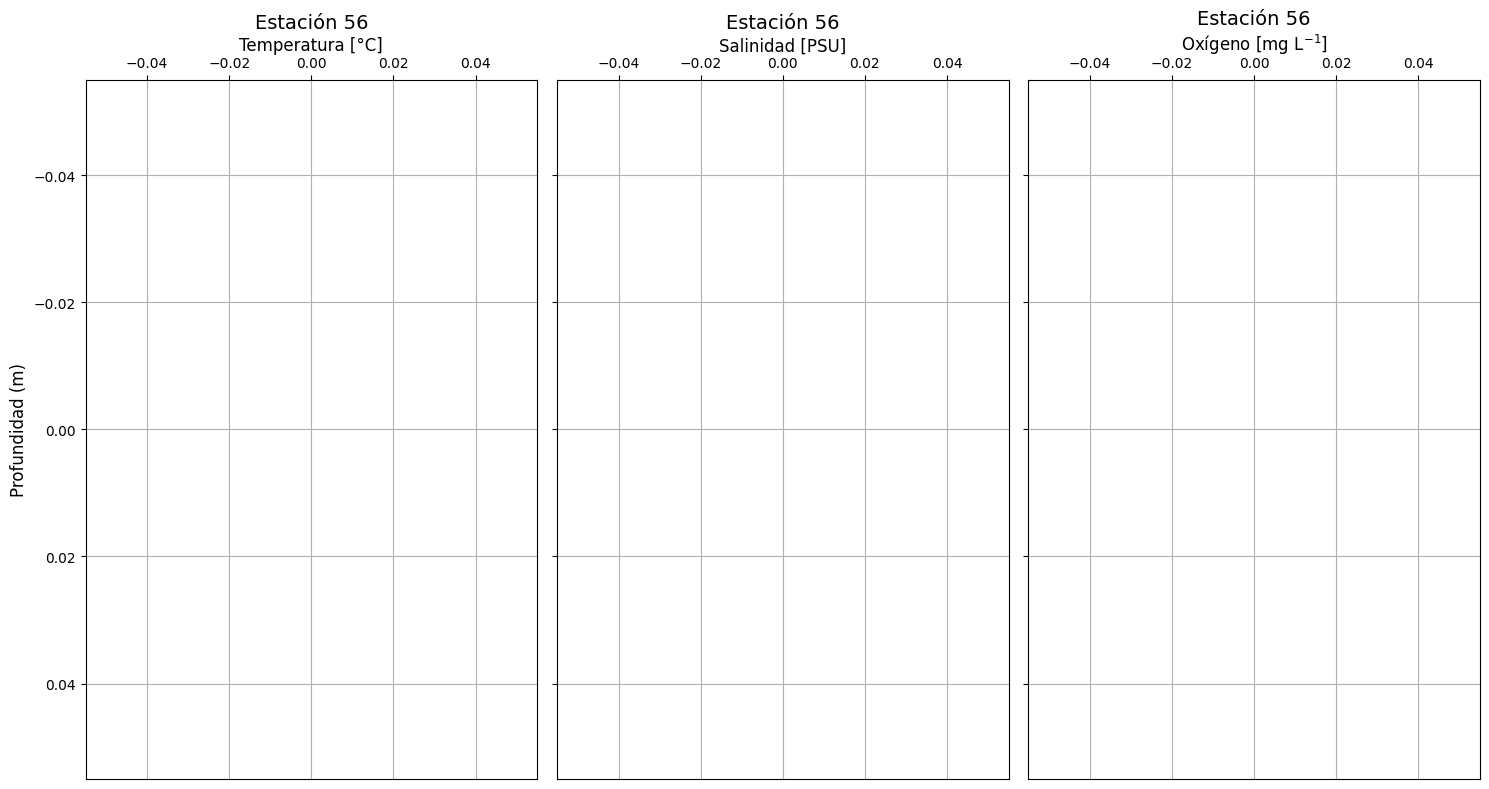

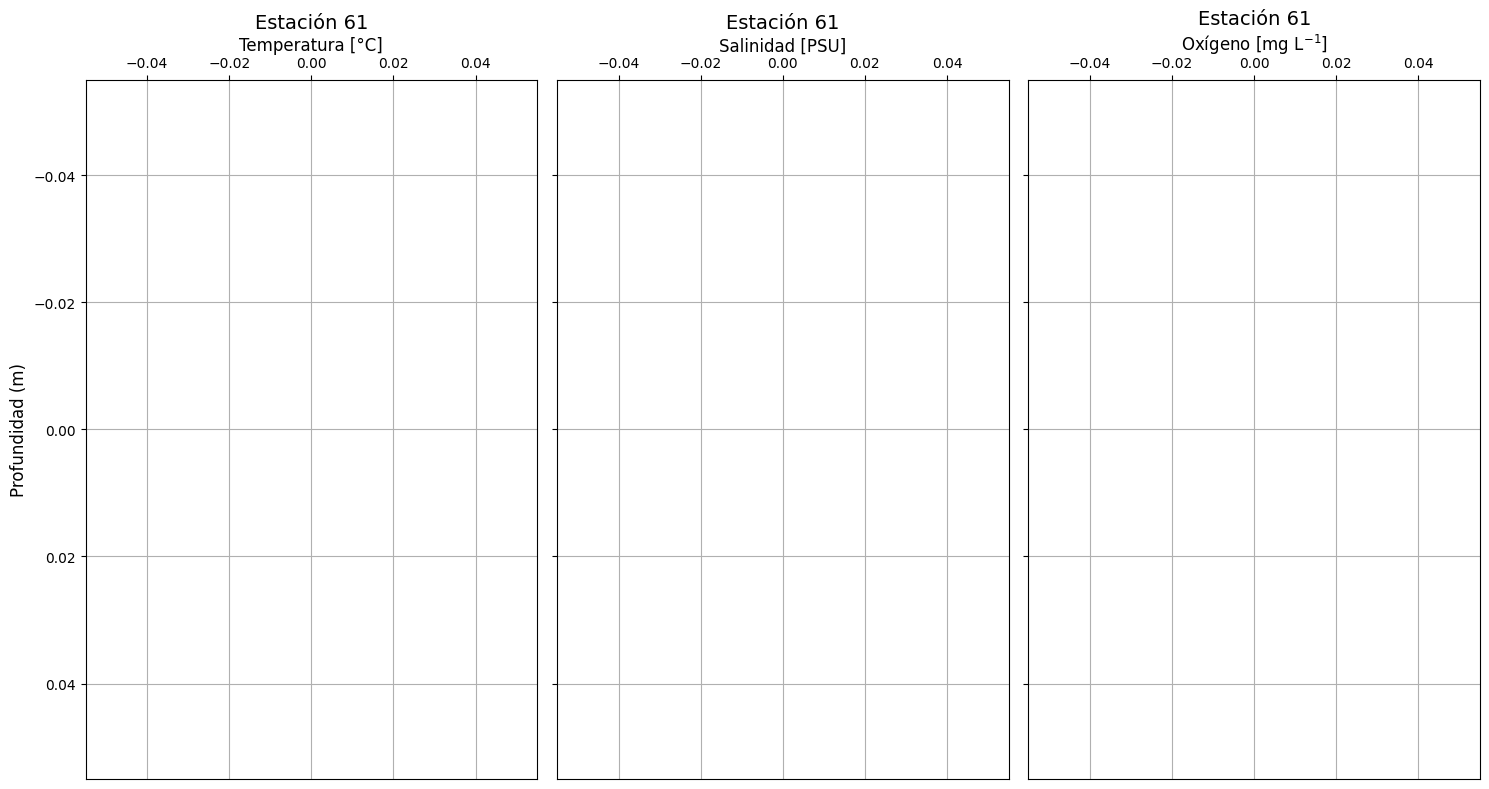

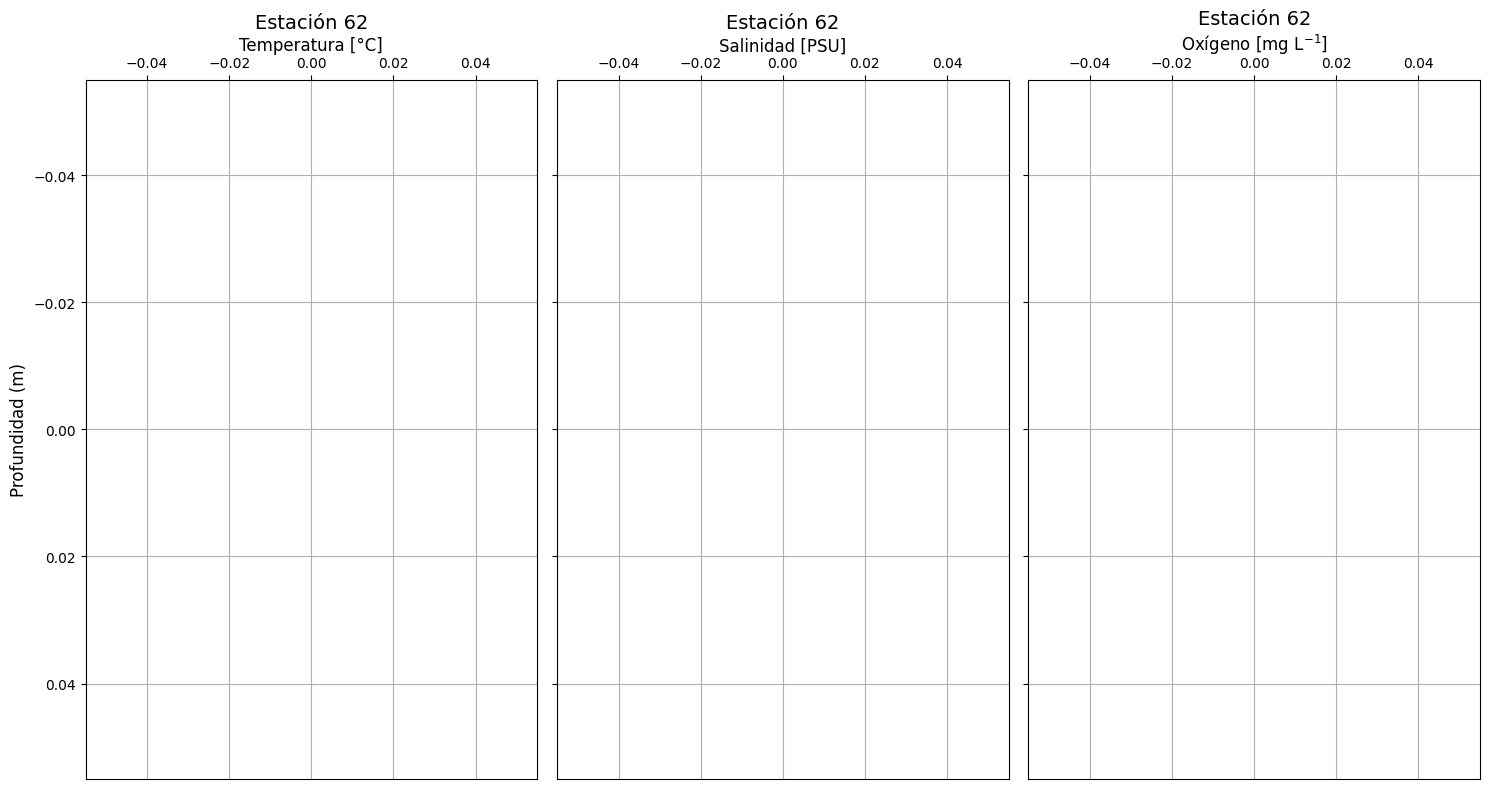

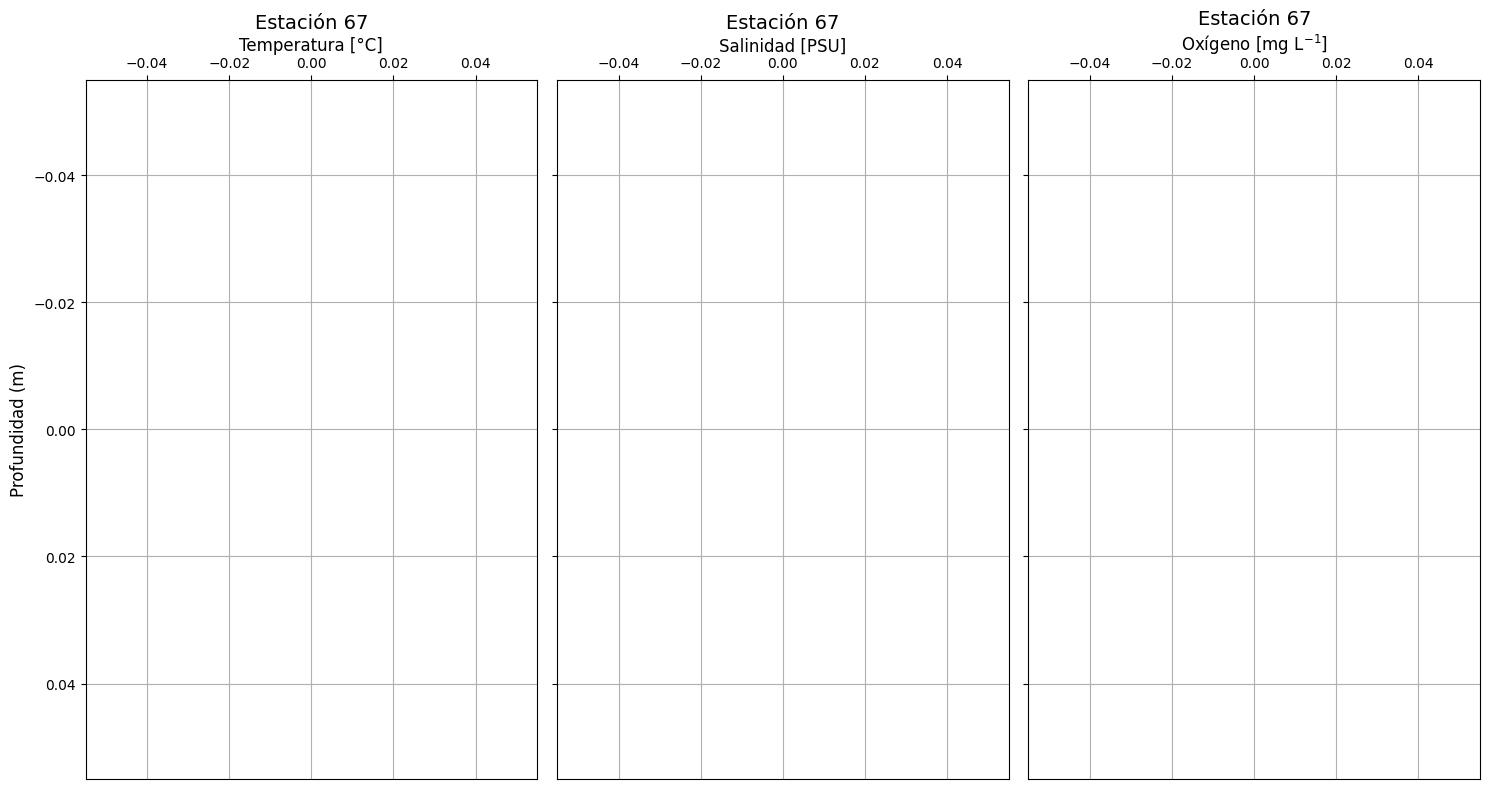

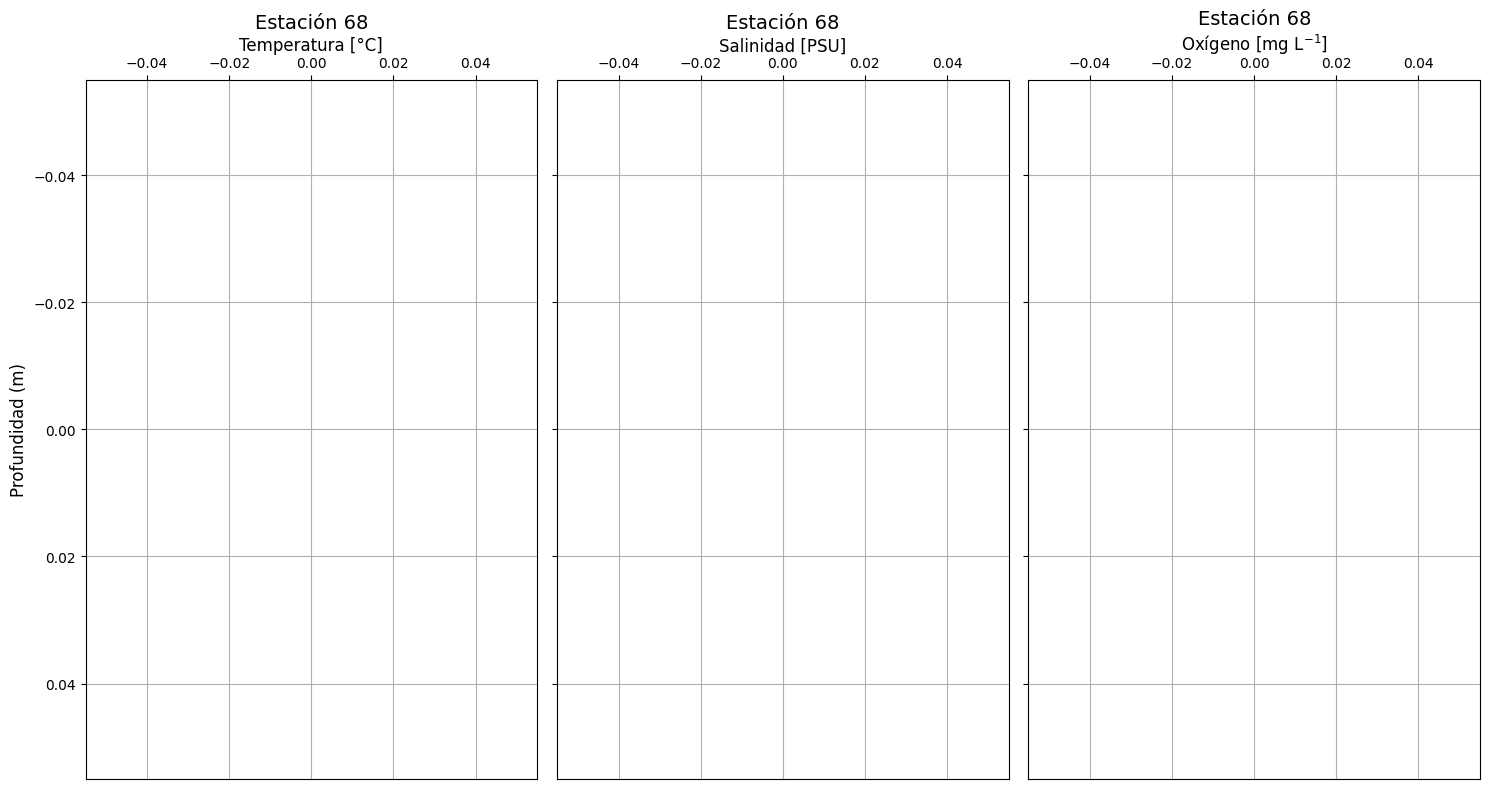

In [37]:
for i in estaciones_list_1993_04:
    datos_filtrados = graficasERFEN.filtrado(CPC_1993_04_long, i)
    graficasERFEN.graficar_datos(datos_filtrados,i)
    #graficasERFEN.grafica_export(datos_filtrados,i)
    #graficasERFEN.graficar_multiejes(datos_filtrados,i)
    

In [38]:
print(temperatura)

0      27.0
1      27.3
2      27.5
3      22.3
4      18.2
       ... 
579    10.4
580     8.9
581     6.4
582     5.2
583     5.0
Name: Value, Length: 584, dtype: float64


In [39]:
# -*- coding: utf-8 -*-
import gsw
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
########################
# Sigmoid function
########################
def fsigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

########################
# Normalization
########################
def norm(y, y_min, y_max):
	return (y - y_min)/(y_max-y_min)

########################
# Denormalization
########################
def unnorm(y, y_min, y_max):
	return y*(y_max-y_min)+y_min

########################
def NsquaredT(SA, CT, p, lat=None, axis=0):
	# Modified from gsw Nsquared function to get NsquaredT 
	# (release https://github.com/TEOS-10/GSW-Python/releases/tag/v3.6.16.post1)
	if lat is not None:
		if np.any((lat < -90) | (lat > 90)):
			raise ValueError('lat is out of range')
		SA, CT, p, lat = np.broadcast_arrays(SA, CT, p, lat)
		g = gsw.grav(lat, p)
	else:
		SA, CT, p = np.broadcast_arrays(SA, CT, p)
		g = 9.7963
	def axis_slicer(n, sl, axis):
		itup = [slice(None)] * n
		itup[axis] = sl
		return tuple(itup)
	
	db_to_pa = 1e4
	shallow = axis_slicer(SA.ndim, slice(-1), axis)
	deep = axis_slicer(SA.ndim, slice(1, None), axis)
	if lat is not None:
		g_local = 0.5 * (g[shallow] + g[deep])
	else:
		g_local = g
	
	dSA = SA[deep] - SA[shallow]
	dCT = CT[deep] - CT[shallow]
	dp = p[deep] - p[shallow]
	SA_mid = 0.5 * (SA[shallow] + SA[deep])
	CT_mid = 0.5 * (CT[shallow] + CT[deep])
	p_mid = 0.5 * (p[shallow] + p[deep])
	
	specvol_mid, alpha_mid, beta_mid = gsw.specvol_alpha_beta(SA_mid, CT_mid, p_mid)
	
	N2T = ((g_local**2) / (specvol_mid * db_to_pa * dp))
	N2T = N2T * alpha_mid*dCT
	
	return N2T, p_mid

def thermocline(asal, ctemp, pres, lat, m_precision=0.01, threshold=0.2):
	########################
	# parameters:
	# 	df: Dataset, columns=['pres','asal','ctemp']
	# 	m_precision: Accuracy in meters
	#	threshold: Threshold for determining MLD and MTD
	########################
	x_true = pres
	y_true = ctemp

	########################
	# Calculates the buoyancy frequency squared (N2)
	########################
	N2T, p_mid = NsquaredT(asal, ctemp, pres, lat = lat)
	N2T = np.vstack((N2T, p_mid)).T

	########################
	# Obtain the pressure range where N2T is greater
	########################
	try:
		index = np.argmax(np.abs(N2T[:,0]))
	except:
		return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

	max_pres = p_mid[index]*2
	index = x_true < max_pres
	x_true = x_true[index] 
	y_true = y_true[index]
	N2T = N2T[index[:-1]]

	########################
	# Normalize data
	########################
	sign = 1
	if (np.mean(y_true[:2]) > np.mean(y_true[-2:])):
		y_true = -y_true # It is inverted to resemble the function
		sign = -1

	y_min = np.min(y_true) # Min before normalizing
	y_max = np.max(y_true) # Max before normalizing
	y_true = norm(y_true, y_min, y_max) # Normalization

	bounds = ([np.min(y_true), np.min(x_true)], # Lower and upper limits of the parameters
			  [np.max(y_true), np.max(x_true)])

	########################
	# Fit data to sigmoid
	########################
	try:
		popt, pcov = curve_fit(fsigmoid, x_true, y_true, method='dogbox', bounds=bounds)
	except:
		return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

	x_pred = np.linspace(np.min(x_true), np.max(x_true), int(np.max(x_true)-np.min(x_true)))
	y_pred = fsigmoid(x_pred, *popt)

	########################
	# Calculate coefficient of determination (R2)
	########################	
	r2 = r2_score(y_true, fsigmoid(x_true, *popt))

	########################
	# Denormalization data
	########################
	y_true = unnorm(y_true, y_min, y_max) # Denormalize real data
	y_pred = unnorm(y_pred, y_min, y_max) # Denormalize predicted data

	########################
	#  Calculate MLD
	######################### 
	pres_10m = 10
	temp_10m = unnorm(fsigmoid(pres_10m, *popt), y_min, y_max)

	pres_mld = np.nan
	temp_mld = np.nan
	for k in np.arange(pres_10m + m_precision, x_true[-1], m_precision): # check every cm
		temp_mld = unnorm(fsigmoid(k, *popt), y_min, y_max)
		if (temp_mld - temp_10m) >= threshold:
			pres_mld = k
			break

	########################
	#  Calculate MTD
	######################### 
	pres_deep = x_true[-1]
	temp_deep = unnorm(fsigmoid(pres_deep, *popt), y_min, y_max)
	
	pres_mtd = np.nan
	temp_mtd = np.nan
	if ~np.isnan(pres_mld):
		for k in np.arange(pres_deep + m_precision, pres_mld, -m_precision): # check every cm
			temp_mtd = unnorm(fsigmoid(k, *popt), y_min, y_max)
			if (temp_deep - temp_mtd) >= threshold:
				pres_mtd = k
				break

	if pres_mld > pres_mtd:
		return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

	return pres_mtd, temp_mtd*sign, pres_mld, temp_mld*sign, r2, N2T, x_pred, y_pred*sign



In [40]:


temperatura = CPC_1993_04_long[(CPC_1993_04_long.Variable == 'Temperatura [°C]') & (CPC_1993_04_long.Estacion == 68)].sort_values('Profundidad')
salinidad = CPC_1993_04_long[(CPC_1993_04_long.Variable == 'Salinidad [PSU]') & (CPC_1993_04_long.Estacion == 68)].sort_values('Profundidad')
oxigeno = CPC_1993_04_long[(CPC_1993_04_long.Variable == 'Oxigeno [mg/l]') & (CPC_1993_04_long.Estacion == 68)].sort_values('Profundidad')

# Datos de ejemplo
salinity = np.array(salinidad['Value'])  # PSU
temperature = np.array(temperatura['Value'])  # °C
depth = np.array(salinidad['Profundidad'])  # metros
longitude = np.array([-78.0])  # grados decimales
latitude = np.array([5.0])  # grados decimales

# Verificación de datos
assert np.all((salinity >= 0) & (salinity <= 42)), "Salinidad fuera de rango"
assert np.all((temperature >= -2) & (temperature <= 40)), "Temperatura fuera de rango"
assert np.all(depth >= 0), "Profundidad negativa"
assert np.all((longitude >= -180) & (longitude <= 180)), "Longitud fuera de rango"
assert np.all((latitude >= -90) & (latitude <= 90)), "Latitud fuera de rango"

# Cálculos
asal = gsw.SA_from_SP(salinity, depth, longitude, latitude)
ctemp = gsw.CT_from_t(asal, temperature, depth)

#print("Salinidad absoluta (SA):", asal)
print("Temperatura conservativa (CT):", ctemp)

Temperatura conservativa (CT): []


In [17]:
pres_mtd, temp_mtd, pres_mld, temp_mld, r2, N2T, pres_pred, temp_pred = thermocline(asal, ctemp, depth, latitude)

La capa de mezcla está a una profundidad aproximada de 15.64999999999988 metros.
La termoclina está a una profundidad aproximada de 44.15000000000156 metros.


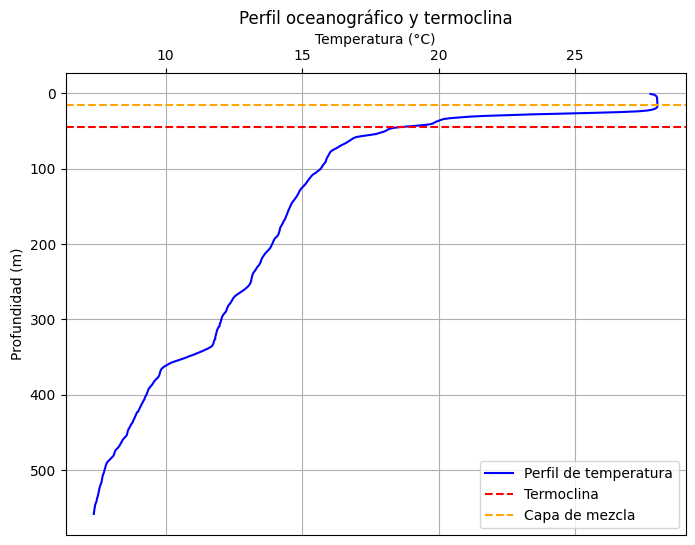

In [18]:
# Mostrar resultados
print(f"La capa de mezcla está a una profundidad aproximada de {pres_mld} metros.")
print(f"La termoclina está a una profundidad aproximada de {pres_mtd} metros.")


# Visualización
plt.figure(figsize=(8, 6))
plt.plot(temperature, depth, label="Perfil de temperatura", color="blue")
plt.axhline(y=pres_mtd, color="red", linestyle="--", label="Termoclina")
plt.axhline(y=pres_mld, color="orange", linestyle="--", label="Capa de mezcla")
plt.gca().invert_yaxis()  # Invertir el eje de profundidad
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.xlabel("Temperatura (°C)")
plt.ylabel("Profundidad (m)")
plt.title("Perfil oceanográfico y termoclina")
plt.legend()
plt.grid()
plt.show()


In [19]:
def calculo_SalTemp_Abs(dataSal, dataTemp):
    
    salinity = np.array(dataSal['Value'])  # PSU
    temperature = np.array(dataTemp['Value'])  # °C
    depth = np.array(dataSal['Profundidad'])  # metros
    longitude = np.array(dataSal['Longitud'].unique())  # grados decimales
    latitude = np.array(dataSal['Latitud'].unique())  # grados decimales

    # Verificación de datos
    assert np.all((salinity >= 0) & (salinity <= 42)), "Salinidad fuera de rango"
    assert np.all((temperature >= -2) & (temperature <= 40)), "Temperatura fuera de rango"
    assert np.all(depth >= 0), "Profundidad negativa"
    assert np.all((longitude >= -180) & (longitude <= 180)), "Longitud fuera de rango"
    assert np.all((latitude >= -90) & (latitude <= 90)), "Latitud fuera de rango"

    # Cálculos
    asal = gsw.SA_from_SP(salinity, depth, longitude, latitude)
    ctemp = gsw.CT_from_t(asal, temperature, depth)
    
    pres_mtd, temp_mtd, pres_mld, temp_mld, r2, N2T, pres_pred, temp_pred = thermocline(asal, ctemp, depth, latitude)
    
        
    plt.figure(figsize=(8, 6))
    plt.plot(temperature, depth, label="Perfil de temperatura", color="blue")
    plt.axhline(y=pres_mtd, color="red", linestyle="--", label="Termoclina")
    plt.axhline(y=pres_mld, color="orange", linestyle="--", label="Capa de mezcla")
    plt.gca().invert_yaxis()  # Invertir el eje de profundidad
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Profundidad (m)")
    plt.title("Perfil oceanográfico y termoclina")
    plt.legend()
    plt.grid()
    plt.show()
    
    return(pres_mtd, temp_mtd, pres_mld, temp_mld, r2)


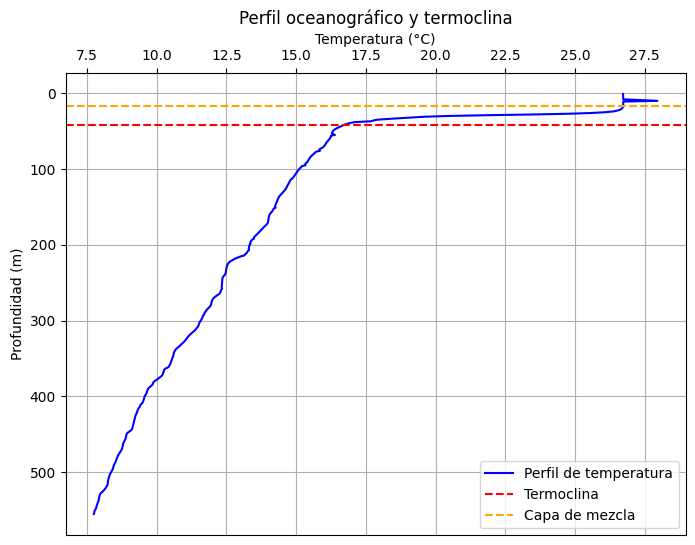

(np.float64(42.06000000000277),
 np.float64(16.437452498927986),
 np.float64(16.51999999999986),
 np.float64(27.725305325767195),
 0.9787719800663177)

In [42]:
temperatura = dataset_FA[(dataset_FA.Variable == 'Temperatura [°C]') & (dataset_FA.Estacion == 113)].sort_values('Profundidad')
salinidad = dataset_FA[(dataset_FA.Variable == 'Salinidad [PSU]') & (dataset_FA.Estacion == 113)].sort_values('Profundidad')
oxigeno = dataset_FA[(dataset_FA.Variable == 'Oxigeno [mg/l]') & (dataset_FA.Estacion == 113)].sort_values('Profundidad')


calculo_SalTemp_Abs(salinidad, temperatura)

In [28]:
class MovSTDCalculator:
    def __init__(self, profile, frame, threshold_factor=0.5, min_std=None):
        self.profile = np.array(profile)
        self.frame = frame
        self.threshold_factor = threshold_factor
        self.min_std = min_std if min_std is not None else self.calculate_min_std()
    
    def moving_mean_std(self):
        profile_series = pd.Series(self.profile)
        moving_mean = profile_series.rolling(self.frame, min_periods=1).mean()
        moving_std = profile_series.rolling(self.frame, min_periods=1).std()
        return moving_mean, moving_std
    
    def calculate_std_threshold(self, moving_std):
        return self.threshold_factor * np.nanmax(moving_std)
    
    def calculate_min_std(self):
        return np.nanstd(self.profile)
    
    def detect_transition_depth(self):
        if np.nanstd(self.profile) < self.min_std:
            return np.nan
        
        flat = pd.Series(self.profile).rolling(self.frame, min_periods=1).mean()
        mstd = pd.Series(flat).rolling(self.frame, min_periods=1).std()
        
        idx = np.nanargmax(mstd)
        max_std = mstd[idx]
        
        for i in range(1, idx + 1):
            if mstd[idx - i] < self.threshold_factor * max_std:
                return idx - i
        
        return np.nan

Moving Mean: [26.2476, 26.25495, 26.259599999999995, 26.26686666666667, 26.26986666666667, 26.2719, 26.273566666666664, 26.2744, 26.273866666666667, 26.273533333333333, 26.27333333333333, 26.2731, 26.2727, 26.272266666666667, 26.2719, 26.271533333333334, 26.270899999999997, 26.269333333333336, 26.266166666666667, 26.261066666666668, 26.254900000000003, 26.24893333333333, 26.2441, 26.24053333333333, 26.2377, 26.234799999999996, 26.230866666666667, 26.224433333333334, 26.211700000000004, 26.1872, 26.142766666666663, 26.064700000000002, 25.907633333333337, 25.6103, 25.091866666666665, 24.305866666666663, 23.336399999999998, 22.356133333333332, 21.491533333333333, 20.708433333333332, 19.880233333333333, 19.053066666666666, 18.332666666666668, 17.8362, 17.520233333333334, 17.3045, 17.130200000000002, 16.97666666666667, 16.851266666666668, 16.755133333333333, 16.668533333333333, 16.576966666666667, 16.4816, 16.401466666666668, 16.344866666666665, 16.306533333333334, 16.27633333333333, 16.249

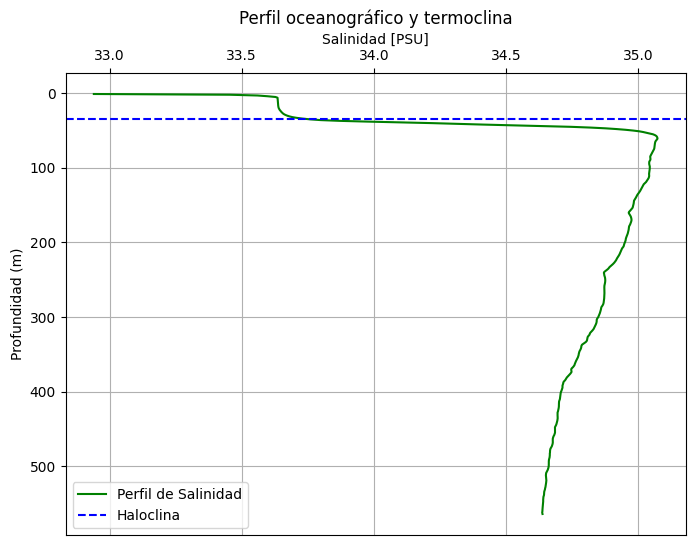

In [41]:
profile = [34.5, 34.6, 34.8, 35.1, 35.6, 36.2, 36.8, 37.2, 37.3, 37.35, 37.4]
frame = 3
calculator = MovSTDCalculator(temperature, frame)

moving_mean, moving_std = calculator.moving_mean_std()
thres = calculator.calculate_std_threshold(moving_std)
min_std = calculator.calculate_min_std()
index_TD = calculator.detect_transition_depth()

print("Moving Mean:", moving_mean.tolist())
print("Moving STD:", moving_std.tolist())
print("Threshold:", thres)
print("MINSTD:", min_std)
print("Transition Depth Index:", index_TD)

plt.figure(figsize=(8, 6))
plt.plot(salinity, depth, label="Perfil de Salinidad", color="green")
plt.axhline(y=index_TD, color="blue", linestyle="--", label="Haloclina")
plt.gca().invert_yaxis()  # Invertir el eje de profundidad
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.xlabel("Salinidad [PSU]")
plt.ylabel("Profundidad (m)")
plt.title("Perfil oceanográfico y termoclina")
plt.legend()
plt.grid()
plt.show()
    
